# Time series analysis for Identification of PV, EV, HP

## EDA for Feature exploration

In [6]:

import glob, os,warnings,copy
from pathlib import Path
import pandas as pd
#####
directory = Path.cwd()
time_series_Consumption=pd.read_pickle(os.path.join(directory,'all_time_series_Consumption.pkl'))
time_series_Consumption.set_index('Datetime', inplace=True)
labels_df_org=pd.read_pickle(os.path.join(directory,'labels_df.pkl'))[['ID','Category']]


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import seaborn as sns
import copy

# Data have been previously loaded
labels_df = copy.copy(labels_df_org)
time_series_df = copy.copy(time_series_Consumption.resample('M').sum())

# Ensure ID is treated as string for consistency
labels_df["ID"] = labels_df["ID"].astype(str)
time_series_df.columns = time_series_df.columns.astype(str)

# Create a mapping dictionary from ID to Category
id_to_category = labels_df.set_index("ID")["Category"].to_dict()

# Compute ACF for each time series
def compute_acf(series, nlags=40):
    return acf(series, nlags=nlags, fft=True)

acf_results = []
nlags = 11

for col in time_series_df.columns:
    try:
        series = time_series_df[col].dropna()  # Ensure 1D series
        acf_values = compute_acf(series, nlags)
        category = id_to_category.get(col, "Unknown")  # Get category or set to Unknown
        acf_results.append([col, category] + list(acf_values))
    except Exception as e:
        print(f"Error computing ACF for {col}: {e}")

# Convert ACF results to a DataFrame
acf_columns = ["ID", "Category"] + [f'Lag_{i}' for i in range(nlags + 1)]
acf_df = pd.DataFrame(acf_results, columns=acf_columns)


C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_20040\281197469.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_df = copy.copy(time_series_Consumption.resample('M').sum())


C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_20040\3054663710.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(f"2023-{start_month}-01", periods=nlags+1, freq="M").strftime("%b")


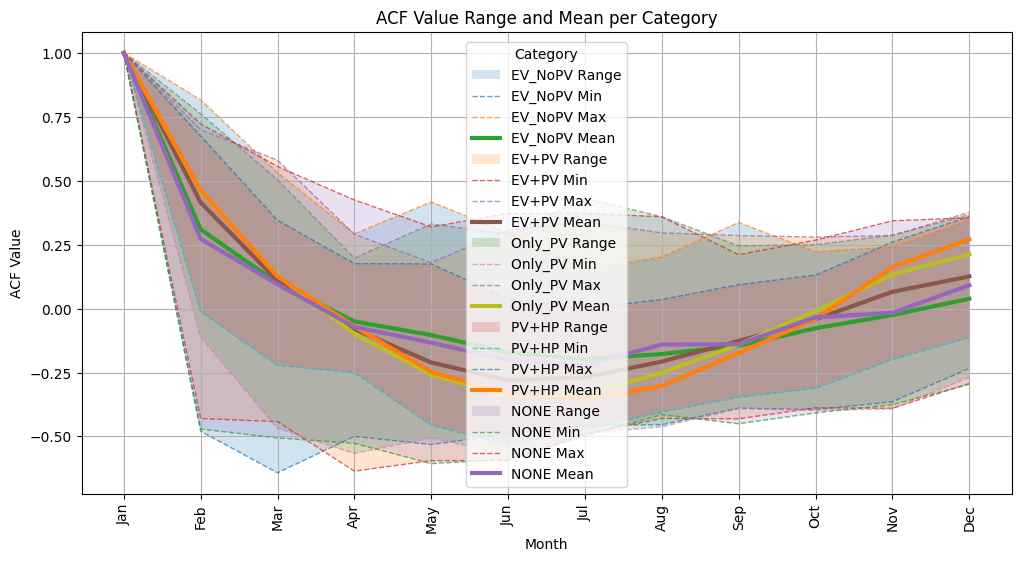

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the start month (e.g., June if shifted)
start_month = 1  # Change this if needed

# Generate month names dynamically based on lags
months = pd.date_range(f"2023-{start_month}-01", periods=nlags+1, freq="M").strftime("%b")
lag_labels = [f"Lag_{i}" for i in range(nlags + 1)]  # Current lag labels

plt.figure(figsize=(12, 6))

# Loop through each category and plot shaded range + mean line
for c in acf_df['Category'].unique():
    subset = acf_df[acf_df['Category'] == c][lag_labels]

    mean_values = subset.mean()  # Mean ACF values
    min_values = subset.min()    # Minimum ACF values
    max_values = subset.max()    # Maximum ACF values

    # Fill between min and max to create the shaded range
    plt.fill_between(range(len(lag_labels)), min_values, max_values, alpha=0.2, label=f"{c} Range")
    
    # Add dashed lines for min and max
    plt.plot(min_values, linestyle='dashed', linewidth=1, label=f"{c} Min", alpha=0.7)
    plt.plot(max_values, linestyle='dashed', linewidth=1, label=f"{c} Max", alpha=0.7)

    # Plot the mean ACF as a thick line
    plt.plot(mean_values, linewidth=3, label=f"{c} Mean")

# Replace lag labels with month names
plt.xticks(ticks=range(len(lag_labels)), labels=months, rotation=90)

plt.xlabel("Month")
plt.ylabel("ACF Value")
plt.title("ACF Value Range and Mean per Category")
plt.legend(title="Category")
plt.grid()
plt.show()

C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_20040\323143844.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results[lag] = anova_table["PR(>F)"][0]  # p-value
C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_20040\323143844.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results[lag] = anova_table["PR(>F)"][0]  # p-value
C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_20040\323143844.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Significant Lags:        Lag        p_value
11  Lag_11  5.056059e-114
10  Lag_10   3.989313e-95
7    Lag_7   2.190401e-50
1    Lag_1   1.155000e-45
4    Lag_4   6.476083e-43
6    Lag_6   1.767954e-41
5    Lag_5   8.495626e-40
0    Lag_0   4.934572e-12
9    Lag_9   2.036689e-06
8    Lag_8   2.658891e-06
3    Lag_3   1.572124e-03
2    Lag_2   4.402314e-02


C:\Users\SHARIFIM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\sandbox\stats\multicomp.py:1300: RuntimeWarning: invalid value encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
C:\Users\SHARIFIM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\SHARIFIM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_20040\323143844.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

Lag with highest correlation: Lag_11 (Correlation: 0.4523)


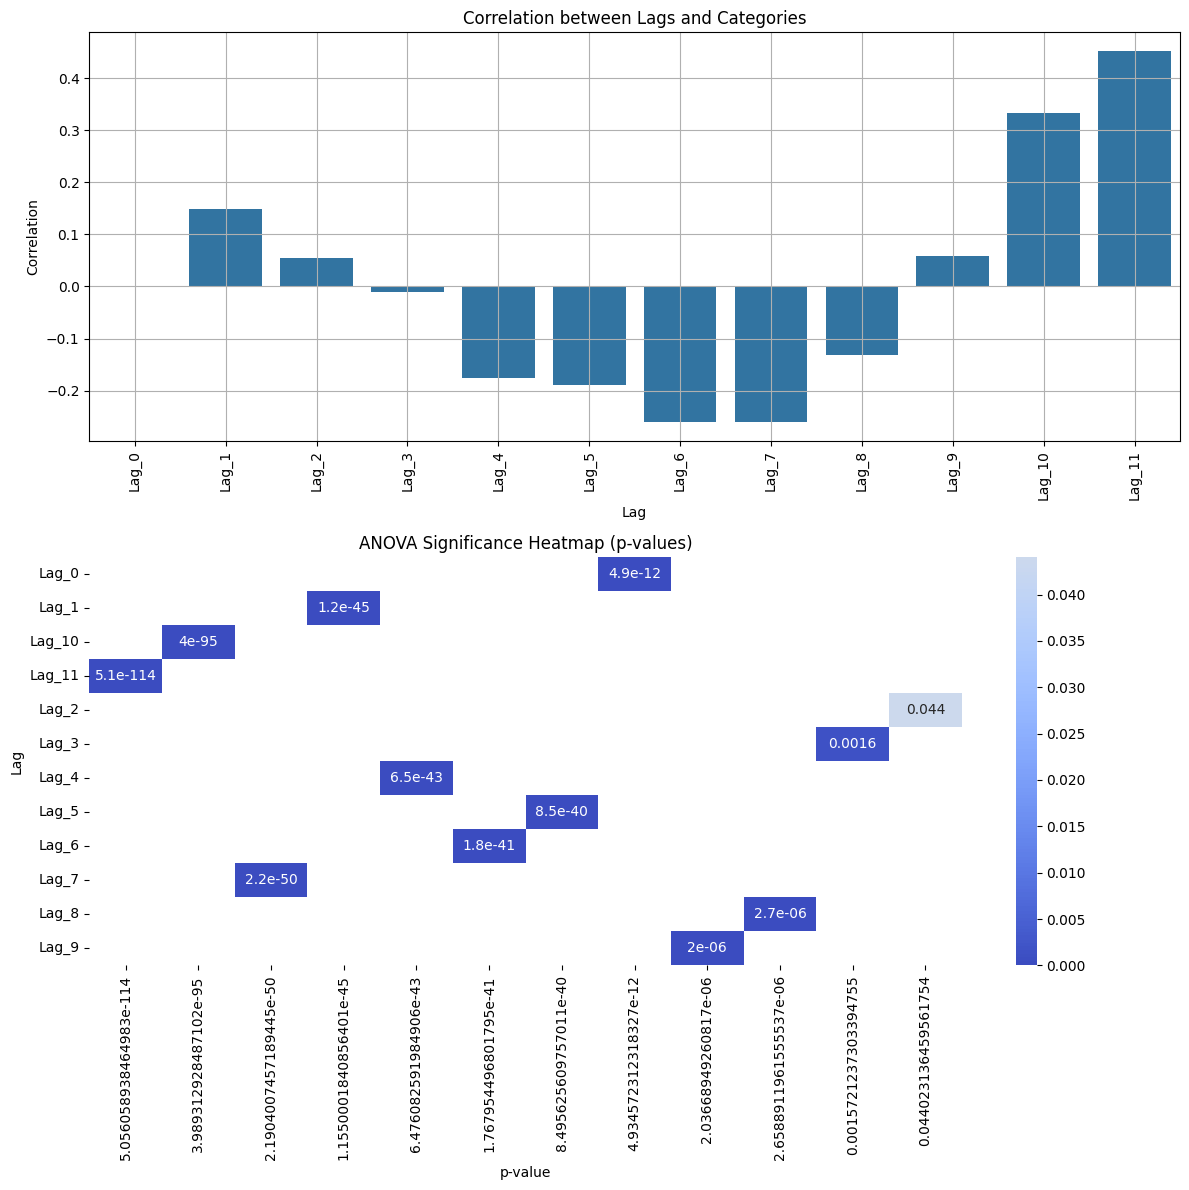

In [68]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming `acf_df` is already loaded

# Extract numeric lag columns
numeric_cols = [col for col in acf_df.columns if col.startswith('Lag_')]

# Perform ANOVA for each lag
anova_results = {}
for lag in numeric_cols:
    model = ols(f"{lag} ~ Category", data=acf_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[lag] = anova_table["PR(>F)"][0]  # p-value

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results.items(), columns=['Lag', 'p_value'])
anova_df.sort_values(by="p_value", inplace=True)

# Identify significant lags (p-value < 0.05)
significant_lags = anova_df[anova_df["p_value"] < 0.05]
print("Significant Lags:", significant_lags)

# Perform Tukey HSD test if there are significant lags
tukey_results = {}
if not significant_lags.empty:
    for lag in significant_lags["Lag"]:
        tukey = pairwise_tukeyhsd(endog=acf_df[lag], groups=acf_df["Category"], alpha=0.05)
        tukey_results[lag] = tukey.summary()

# Encode categories numerically for correlation analysis
label_encoder = LabelEncoder()
acf_df["Category_Num"] = label_encoder.fit_transform(acf_df["Category"])

# Compute Pearson correlation between numeric categories and lags
correlations = acf_df[numeric_cols].corrwith(acf_df["Category_Num"])

# Identify the lag with highest correlation
best_lag = correlations.abs().idxmax()
best_lag_value = correlations[best_lag]

print(f"Lag with highest correlation: {best_lag} (Correlation: {best_lag_value:.4f})")

# Enhanced visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Barplot of correlation between lags and categories
sns.barplot(x=correlations.index, y=correlations.values, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title("Correlation between Lags and Categories")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Correlation")
ax[0].grid()

# Heatmap of significant ANOVA results (only if data exists)
if not anova_df.empty:
    anova_pivot = anova_df.pivot(index='Lag', columns='p_value', values='p_value')
    sns.heatmap(anova_pivot, annot=True, cmap="coolwarm", center=0.05, ax=ax[1])
    ax[1].set_title("ANOVA Significance Heatmap (p-values)")
    ax[1].set_xlabel("p-value")
    ax[1].set_ylabel("Lag")

plt.tight_layout()
plt.show()


# Fluvious Data

## Import input data and libraries

In [215]:
import glob, os,warnings
from pathlib import Path
import pandas as pd

In [216]:
warnings.filterwarnings("ignore")
directory = Path.cwd().parent.parent/'Fluvius open data/Fluvius case electricity'
csv_files=glob.glob(os.path.join(directory, "*.csv"))
time_series_Consumption = pd.DataFrame()
labels_data=[]
for file in csv_files:
    df = pd.read_csv(file)
    # Rename columns to English
    df = df.rename(columns={
        'EAN_ID': 'ID',
        'Datum_Startuur': 'Time',
        'Volume_Afname_kWh': 'Volume_Consumption_kWh',
        'Volume_Injectie_kWh': 'Volume_Injection_kWh',
        'Warmtepomp_Indicator': 'Heatpump',
        'Elektrisch_Voertuig_Indicator': 'Electric_Vehicle',
        'PV-Installatie_Indicator': 'PV_Installation'
    })
    # Combine Date and Time columns into a single datetime column
    df['Time'] = pd.to_datetime(df['Time'])
    # Extract the unique ID and labels
    unique_id = df['ID'].iloc[0]  # Assuming ID is constant within each file
    labels = df[['ID', 'Heatpump', 'Electric_Vehicle', 'PV_Installation']].iloc[0]
    labels_data.append(labels)
    # Append to the list
    time_series_Consumption[str(unique_id)]=df['Volume_Consumption_kWh']
labels_df_real = pd.DataFrame(labels_data)
time_series_Consumption['Datetime']=df.Time


In [217]:
def categorize(row):
    if row['PV_Installation'] == 1 and row['Heatpump'] == 0 and row['Electric_Vehicle'] == 0:
        return "Only_PV"
    elif row['PV_Installation'] == 0 and row['Electric_Vehicle'] == 0:
        return "NONE"
    elif row['PV_Installation'] == 1 and row['Heatpump'] == 1 and row['Electric_Vehicle'] == 0:
        return "PV+HP"
    elif row['PV_Installation'] == 1 and row['Electric_Vehicle'] == 1:
        return "EV+PV"
    elif row['PV_Installation'] == 0 and row['Electric_Vehicle'] == 1:
        return "EV_NoPV"
    else:
        return "Other"  # Catch any cases that don't fit the specified groups

# Apply the categorization function to each row in labels_df
labels_df['Category'] = labels_df.apply(categorize, axis=1)
labels_df

KeyError: 'PV_Installation'

## Data wrangling

In [3]:
import os
from pathlib import Path
import pandas as pd
directory = Path.cwd()
time_series_Consumption=pd.read_pickle(os.path.join(directory,'all_time_series_Consumption.pkl'))
labels_df=pd.read_pickle(os.path.join(directory,'labels_df.pkl'))
time_series_Consumption.set_index('Datetime', inplace=True)

In [5]:
# Reshape time_series_Consumption for feature extraction with tsfresh
# Calculate basic statistical features for each time series (each column)
#time_series_Consumption.set_index('Datetime', inplace=True)
features_df = time_series_Consumption.agg(
    ['mean', 'std', 'max', 'median', 'skew','sum']
).transpose()
# Reset index to have 'ID' as a column for merging with labels
features_df.reset_index(inplace=True)
features_df.rename(columns={'index': 'ID'}, inplace=True)

# Ensure ID column in both features_df and labels_df is of integer type for merging
features_df['ID'] = features_df['ID'].astype(int)
labels_df['ID'] = labels_df['ID'].astype(int)


<Axes: xlabel='Datetime'>

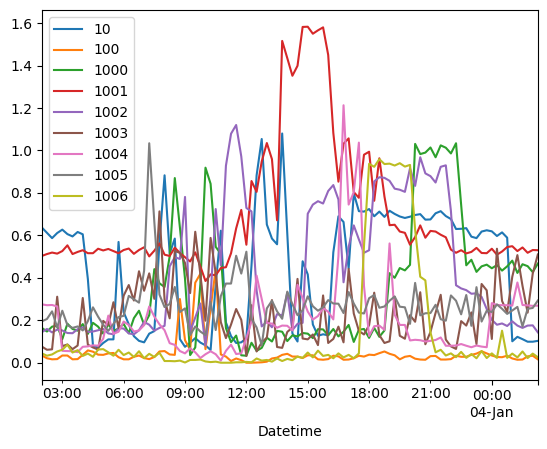

: 

In [ ]:
time_series_Consumption.iloc[200:298, 1:10].plot()

## EDA visualization

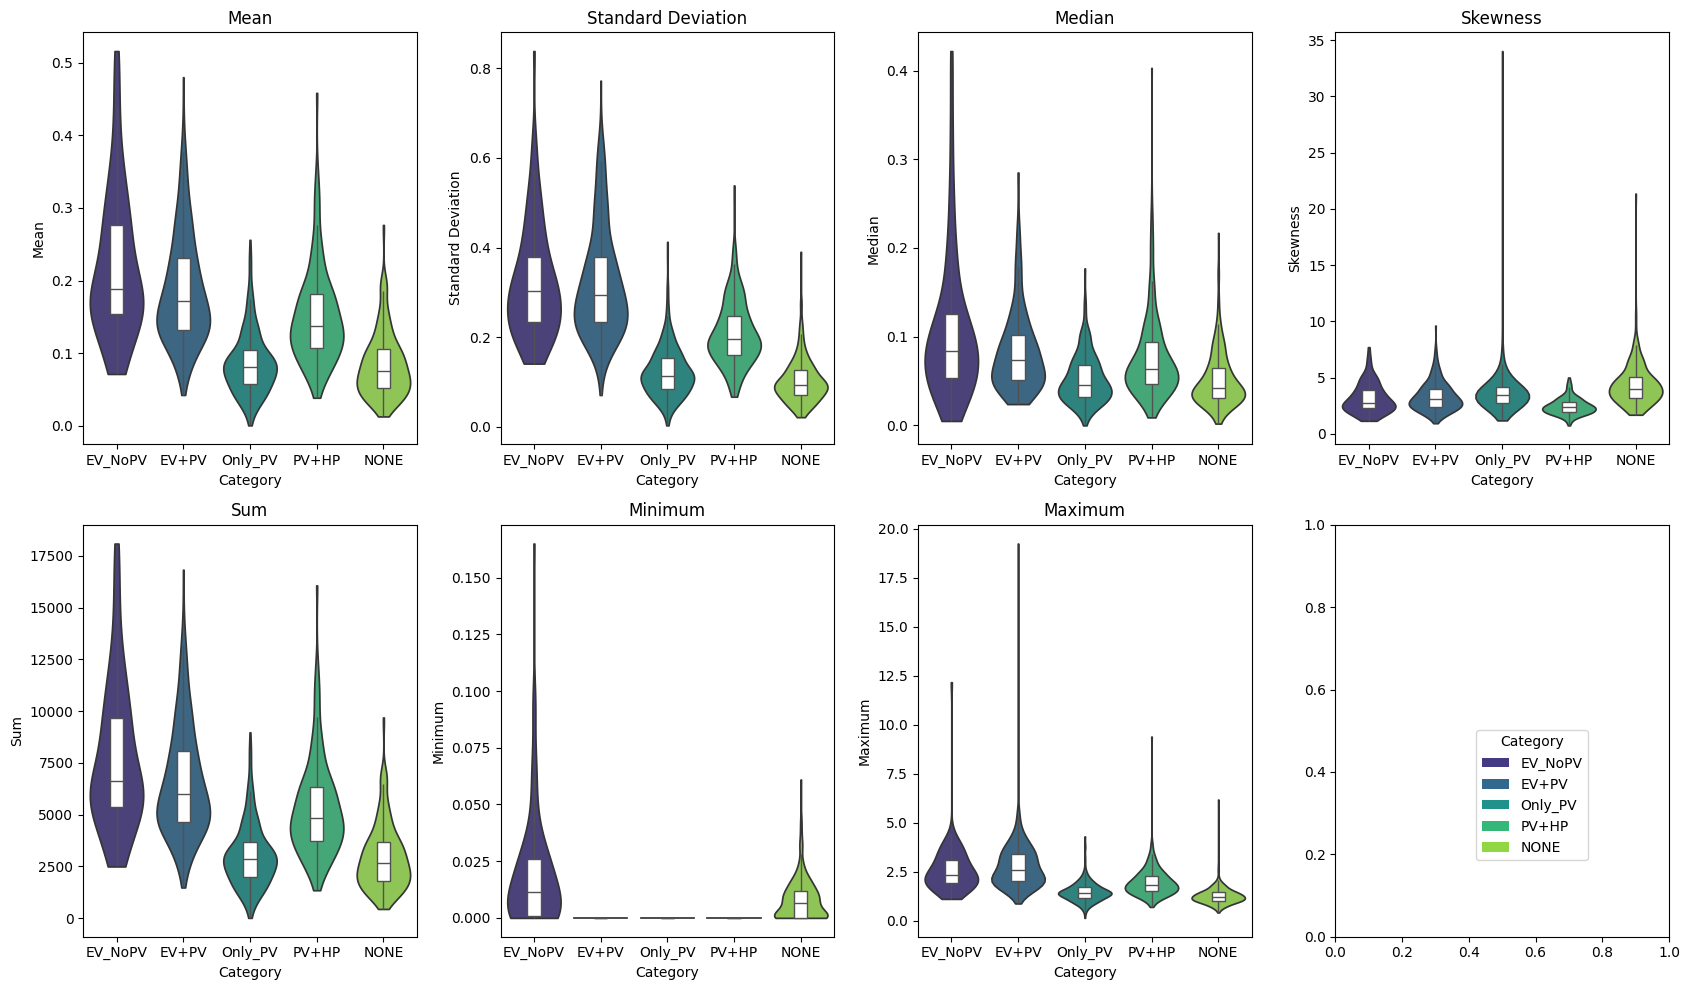

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Step 1: Merge `features_df` and `labels_df` on the 'ID' column
merged_df = pd.merge(features_df, labels_df[['ID', 'Category']], on='ID')

# Step 2: Define the statistics to plot and their titles
features_to_plot = [
    ('mean', "Mean"),
    ('std', "Standard Deviation"),
    ('median', "Median"),
    ('skew', "Skewness"),
    ('sum', "Sum"),
    #('min', "Minimum"),
    ('max', "Maximum")]
# Step 3: Create a 4x2 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figure size to fit the grid
axes = axes.flatten()  # Flatten to easily index subplots

# Define color palette and create custom legend
palette = sns.color_palette("viridis", len(merged_df['Category'].unique()))
category_labels = merged_df['Category'].unique()
legend_elements = [Patch(facecolor=palette[i], label=category_labels[i]) for i in range(len(category_labels))]

# Step 4: Plot each feature's distribution across categories
for i, (feature, title) in enumerate(features_to_plot):
    ax = axes[i]
    
    # Violin plot for the distribution
    sns.violinplot(
        data=merged_df,
        x="Category",
        y=feature,
        inner=None,  # Remove inner box to prevent overlap with boxplot
        ax=ax,
        palette=palette,
        cut=0  # Restrict the violin to data range
    )
    
    # Box plot on top of the violin plot for summary statistics
    sns.boxplot(
        data=merged_df,
        x="Category",
        y=feature,
        whis=1.5,  # Whisker length
        ax=ax,
        width=0.2,  # Narrow width to fit inside the violin plot
        showcaps=False,  # Hide caps
        boxprops={'facecolor':'white', 'zorder':2},  # Make the boxplot white for contrast
        showfliers=False,  # Hide outliers to keep the plot clean
    )
    
    ax.set_title(f'{title}', fontsize=12)
    ax.set_xlabel("Category", fontsize=10)
    ax.set_ylabel(title, fontsize=10)

# Adjust layout to make space for the legend on the right
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Add the custom legend to the right side of the figure
fig.legend(handles=legend_elements, title="Category", loc="center right", bbox_to_anchor=(.8, .2), ncol=1)

plt.show()


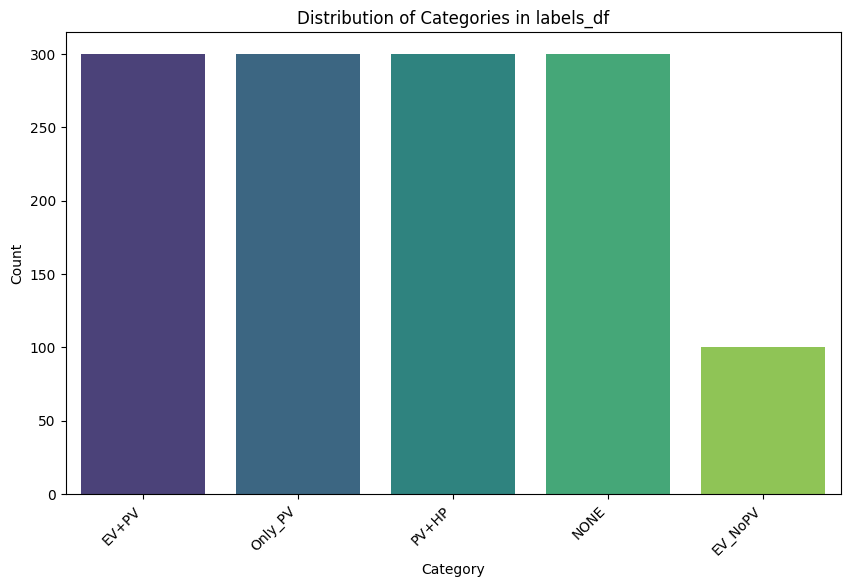

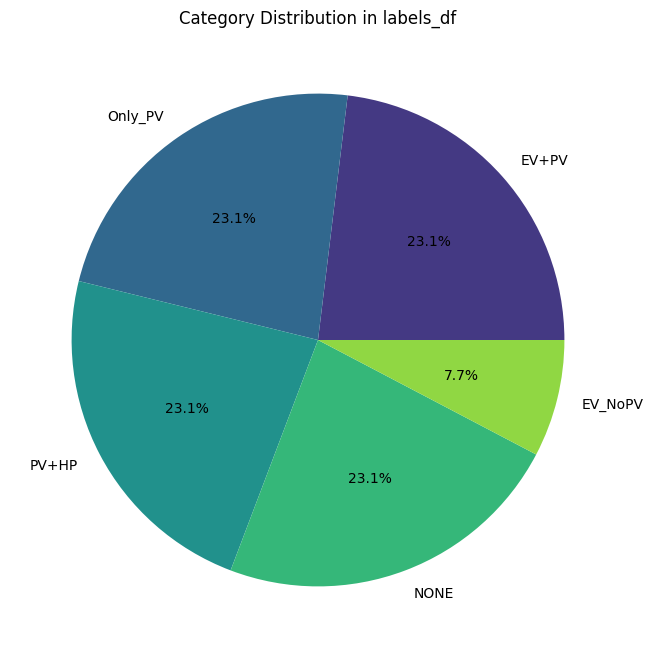

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category in labels_df
category_counts = labels_df['Category'].value_counts()

# Plot the distribution of categories using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribution of Categories in labels_df")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.show()

# Optional: Plot a pie chart for category distribution
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(category_counts)))
plt.title("Category Distribution in labels_df")
plt.show()


## Feature engineering

Accuracy: 0.6230769230769231

Classification Report:
               precision    recall  f1-score   support

       EV+PV       0.58      0.62      0.60        53
     EV_NoPV       0.20      0.11      0.14        19
        NONE       0.86      0.81      0.84        70
     Only_PV       0.60      0.58      0.59        60
       PV+HP       0.51      0.60      0.55        58

    accuracy                           0.62       260
   macro avg       0.55      0.55      0.54       260
weighted avg       0.62      0.62      0.62       260



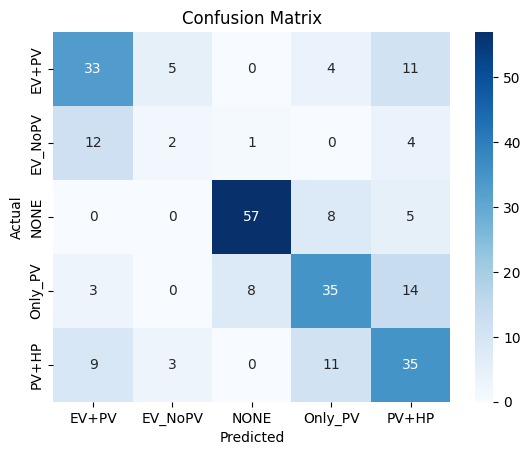

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Merge features and labels
data = pd.merge(features_df, labels_df[['ID', 'Category']], on='ID')

# Step 2: Separate features (X) and target (y)
X = data[['mean', 'std', 'max', 'median', 'skew', 'sum']]
y = data['Category']

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Initialize and train the model (Random Forest as an example)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate the model on test data
y_pred = rf_model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `rf_model` is our trained Random Forest model and `X_test`, `y_test` are our test features and labels
# Step 1: Make predictions
y_pred = rf_model.predict(X_test)

# Step 2: Calculate accuracy for each category (label)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

# Step 3: Detailed classification report (includes precision, recall, f1-score for each label)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:\n", report_df)

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 5: Feature Importance
feature_importances = rf_model.feature_importances_
features = X_test.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()



## Extracting more features
We use not only annual but monthly and weekly features to see if we can improve the model prediction

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Define a function to extract weekly and monthly features with prefixed row names and a single 'feature' column
def extract_time_features(df, freq, prefix):
    # Calculate statistics for each period individually
    mean = df.resample(freq).mean()
    mean.index = [f"{prefix}_mean_{i}" for i in range(len(mean))]
    
    std = df.resample(freq).std()
    std.index = [f"{prefix}_std_{i}" for i in range(len(std))]
    
    skew = df.resample(freq).apply(pd.Series.skew)
    skew.index = [f"{prefix}_skew_{i}" for i in range(len(skew))]
    
    min_ = df.resample(freq).min()
    min_.index = [f"{prefix}_min_{i}" for i in range(len(min_))]
    
    max_ = df.resample(freq).max()
    max_.index = [f"{prefix}_max_{i}" for i in range(len(max_))]
    
    # Concatenate all features
    features = pd.concat([mean, std, skew,  max_], axis=0) #min_,
    
    # Reset the index to have 'feature' as a column and IDs as columns
    features = features.reset_index()
    features = features.rename(columns={'index': 'feature'})
    
    return features

# Extract weekly and monthly features for each ID
weekly_features = extract_time_features(time_series_Consumption, 'W', 'W')
monthly_features = extract_time_features(time_series_Consumption, 'M', 'M')
Annual_features = extract_time_features(time_series_Consumption, 'A', 'A')
# Combine weekly and monthly features into a single DataFrame
combined_features = pd.concat([weekly_features, monthly_features,Annual_features], axis=0).reset_index(drop=True)

new_column_names = combined_features['feature'].values
combined_features_temp= combined_features.drop(columns=['feature']).transpose()
combined_features_temp.columns = new_column_names
combined_features_temp=combined_features_temp.reset_index().rename(columns={'index': 'ID'})
combined_features_temp.ID=combined_features_temp.ID.astype(int)
# Step 1: Merge features and labels
data = pd.merge(combined_features_temp, labels_df[['ID', 'Category']], on='ID')

# Step 2: Separate features (X) and target (y)
X = data.drop(columns=['Category','ID'])
y = data['Category']

# seperate part of the data for validation 
X_org, X_valid,y_org, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.25, random_state=42)



C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_14048\1670474102.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean = df.resample(freq).mean()
C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_14048\1670474102.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  std = df.resample(freq).std()
C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_14048\1670474102.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  skew = df.resample(freq).apply(pd.Series.skew)
C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_14048\1670474102.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_ = df.resample(freq).min()
C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_14048\1670474102.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ma

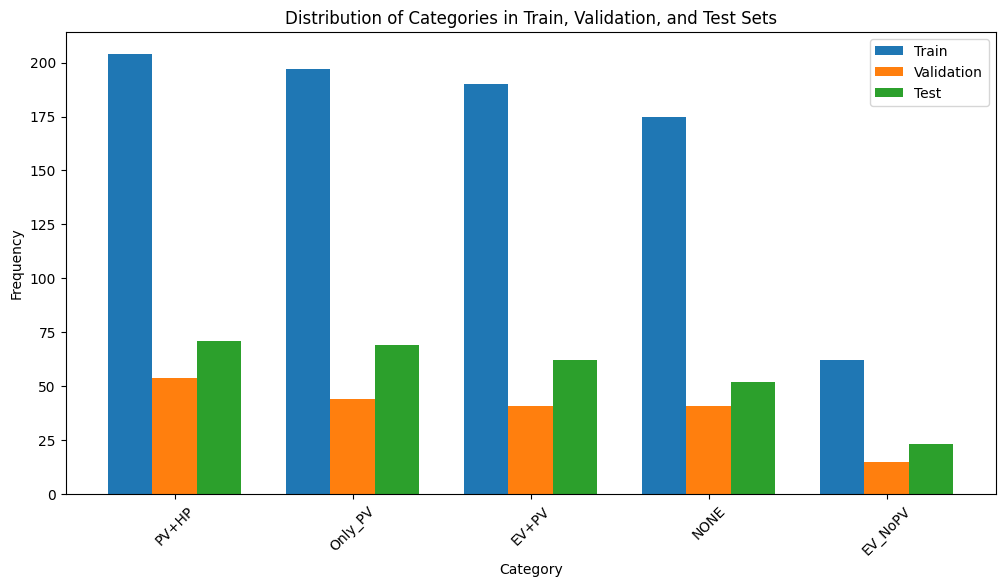

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the counts for each category in each dataset
train_counts = y_train.value_counts()
valid_counts = y_valid.value_counts()
test_counts = y_test.value_counts()

# Create an index for the categories (assuming each has the same categories)
categories = train_counts.index
x = np.arange(len(categories))  # the label locations

# Set the width of each bar and figure size
width = 0.25  # the width of the bars

plt.figure(figsize=(12, 6))

# Plot each dataset's distribution with an offset for each bar group
plt.bar(x - width, train_counts, width, label='Train')
plt.bar(x, valid_counts, width, label='Validation')
plt.bar(x + width, test_counts, width, label='Test')

# Adding labels, title, and customizing the x-axis
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title("Distribution of Categories in Train, Validation, and Test Sets")
plt.xticks(x, categories, rotation=45)
plt.legend()

plt.show()


## RandomForest

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 250, 300, 350, 400, 500],
    'max_depth': [1, 10, 30, 50, None],
    'min_samples_split': [2, 10, 15],
    'min_samples_leaf': [1, 4, 8]
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=50), param_distributions=param_grid,
                               n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit to the training data
rf_random.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)

# Evaluate the best model on test data
best_rf_model = rf_random.best_estimator_
y_pred = best_rf_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50}
Best Score: 0.7463672873311428
Test Accuracy: 0.7545126353790613


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.utils import shuffle
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

# Scoring function
scorer = make_scorer(accuracy_score)

# Tracking results
trial_results = {'grid': [], 'random': [], 'bayes': []}
all_params = {'grid': [], 'random': [], 'bayes': []}
best_models = {}

# ----------------------------
# 1. Refined Grid Search
# ----------------------------
param_grid = {
    'n_estimators': [250, 200,250, 300, 350, 400,450],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring=scorer, cv=5)
grid.fit(X_train, y_train)

for params, score in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
    trial_results['grid'].append(1 - score)
    all_params['grid'].append(params)

best_models['grid'] = grid.best_estimator_

# ----------------------------
# 2. Random Search
# ----------------------------
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(50, 200, 10)],
    'max_depth': [int(x) for x in np.linspace(5, 20, 5)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                 param_distributions=param_dist,
                                 n_iter=100, cv=5, random_state=42,
                                 scoring=scorer, n_jobs=-1)
rand_search.fit(X_train, y_train)

for params, score in zip(rand_search.cv_results_['params'], rand_search.cv_results_['mean_test_score']):
    trial_results['random'].append(1 - score)
    all_params['random'].append(params)

best_models['random'] = rand_search.best_estimator_

# ----------------------------
# 3. Bayesian Optimization
# ----------------------------
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 4, 1)
}

def objective(params):
    clf = RandomForestClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        random_state=42
    )
    acc = cross_val_score(clf, X_train, y_train, cv=5, scoring=scorer).mean()
    loss = 1 - acc
    trial_results['bayes'].append(loss)
    all_params['bayes'].append(params)
    return {'loss': loss, 'status': STATUS_OK}

trials = Trials()
fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=30, trials=trials)

# Get best model from Bayesian Optimization
best_idx = np.argmin(trial_results['bayes'])
best_params_bayes = all_params['bayes'][best_idx]
best_models['bayes'] = RandomForestClassifier(
    n_estimators=int(best_params_bayes['n_estimators']),
    max_depth=int(best_params_bayes['max_depth']),
    min_samples_split=int(best_params_bayes['min_samples_split']),
    min_samples_leaf=int(best_params_bayes['min_samples_leaf']),
    random_state=42
).fit(X_train, y_train)

# ----------------------------
# 4. Plotting Objective Function Values
# ----------------------------
plt.figure(figsize=(10, 5))
for method, values in trial_results.items():
    plt.plot(values, label=method.capitalize())
plt.xlabel("Trial Number")
plt.ylabel("Objective Function Value (1 - accuracy)")
plt.title("Objective Function Values Over Trials")
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Evaluate and Compare Best Models
# ----------------------------
print("\nBest Models Test Accuracy:")
for method, model in best_models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{method.capitalize()}: {acc:.4f}")


KeyboardInterrupt: 

In [19]:
best_models['grid']

RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)

### Visualiztion

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `rf_model` is our trained model, and `X_test`, `y_test` are our test features and labels
best_rf_model=best_models['grid']
# Step 1: Make predictions
y_pred = best_rf_model.predict(X_valid)

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_valid, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for each label (includes precision, recall, F1-score)
print("\nClassification Report:\n")
print(classification_report(y_valid, y_pred, target_names=best_rf_model.classes_))

# Convert the classification report to a DataFrame for easy readability and access
report_df = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True)).transpose()

# Extract per-label accuracy (per-label accuracy is the recall for each label)
per_label_accuracy = report_df['recall']
print("\nPer-Label Accuracy:\n", per_label_accuracy)

# Step 4: Confusion Matrix
cm = confusion_matrix(y_valid, y_pred, labels=best_rf_model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 5: Feature Importance
feature_importances = best_rf_model.feature_importances_
features = X_valid.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Step 2: Sort by importance and select the top 10 features
top_10_importances = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Step 3: Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importances)
plt.title("Top 10 Averaged Feature Importances")
plt.show()


C:\Users\SHARIFIM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 264 features, but RandomForestClassifier is expecting 30 features as input.

Overall Accuracy: 0.87

Classification Report:

              precision    recall  f1-score     support
EV+PV          0.890411  0.942029  0.915493   69.000000
EV_NoPV        0.904762  0.826087  0.863636   23.000000
NONE           0.945205  0.971831  0.958333   71.000000
Only_PV        0.839286  0.758065  0.796610   62.000000
PV+HP          0.759259  0.788462  0.773585   52.000000
accuracy       0.870036  0.870036  0.870036    0.870036
macro avg      0.867785  0.857295  0.861532  277.000000
weighted avg   0.869584  0.870036  0.868919  277.000000


C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_10432\3058329593.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classification_report_df.index[:-3], y=classification_report_df['recall'][:-3], palette="viridis")


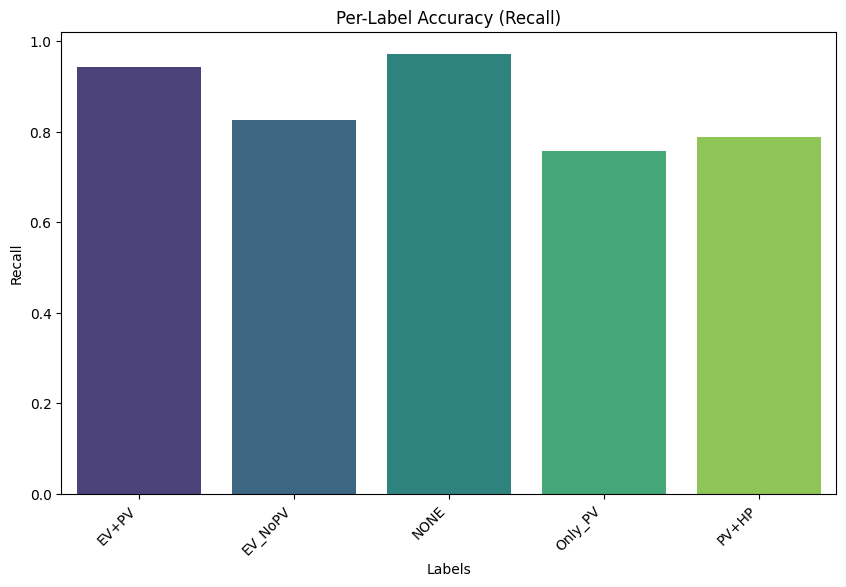

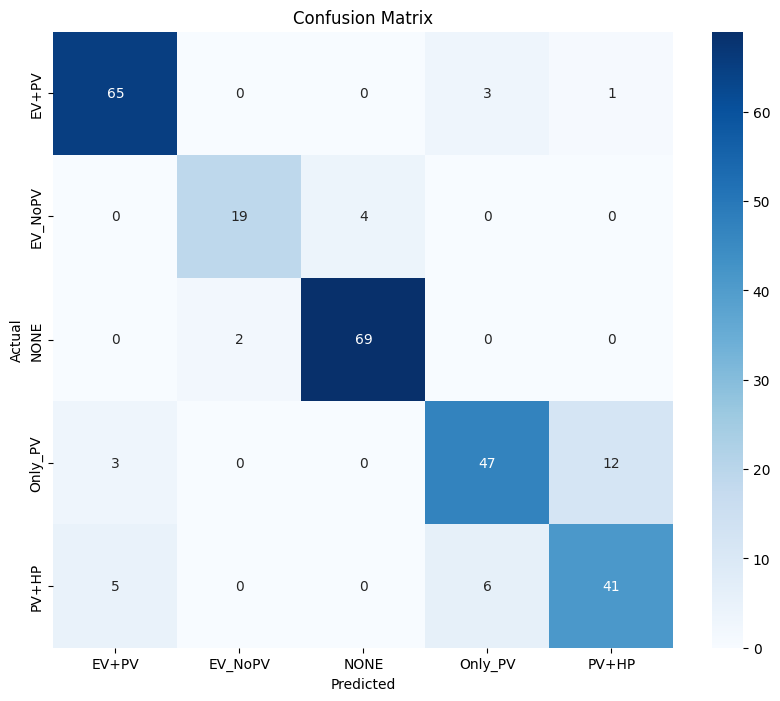

C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_10432\3058329593.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_importances, palette="viridis")


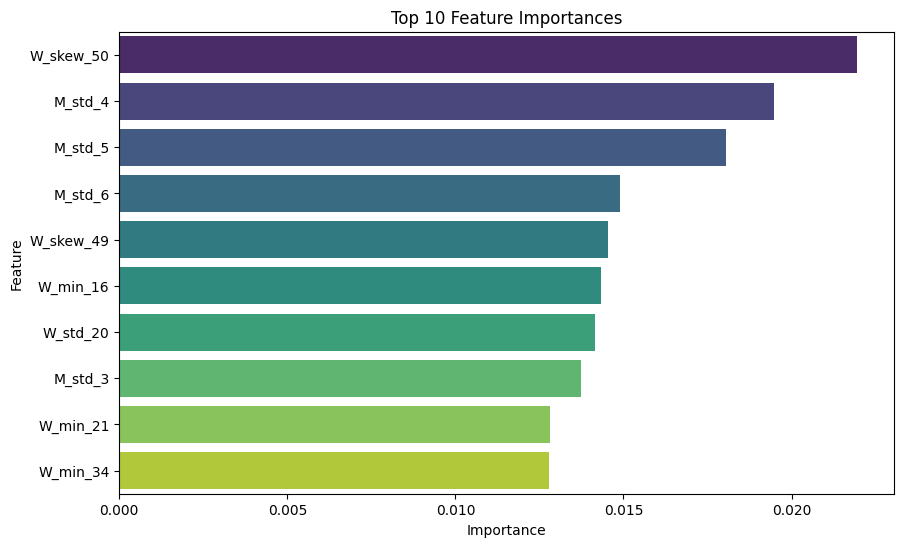

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions using the best model
y_pred = best_rf_model.predict(X_test)

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for per-label accuracy (precision, recall, F1-score for each label)
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display per-label accuracy (recall for each label)
print("\nClassification Report:\n")
print(classification_report_df)

# Plot per-label accuracy (recall)
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_report_df.index[:-3], y=classification_report_df['recall'][:-3], palette="viridis")
plt.title("Per-Label Accuracy (Recall)")
plt.xlabel("Labels")
plt.ylabel("Recall")
plt.xticks(rotation=45, ha="right")
plt.show()

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_rf_model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 5: Feature Importance (Top 10)
# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_
features = X_train.columns  # Assuming `X_train` has the original features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance and select the top 10 features
top_10_importances = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importances, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.show()


In [121]:
import joblib
# Save the model to a file
joblib.dump(best_rf_model, 'best_rf_model.joblib')


['best_rf_model.joblib']

## XGBOOST
we use the same X and y datasets also named data 
we use XGboost

In [ ]:
import numpy as np
import joblib
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_accuracy = 0
best_xgb_model = None  # Placeholder for the best model

# K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split data into training and validation sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the XGBoost model
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = xgb_model.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this is the best model so far
    if fold_accuracy > best_accuracy:
        best_accuracy = fold_accuracy
        best_xgb_model = xgb_model  # Store the model with the best accuracy

    print(f"Fold {fold + 1} Accuracy: {fold_accuracy:.2f}")

# After cross-validation, save the best model to a file
joblib.dump(best_xgb_model, 'best_xgb_model.joblib')
print(f"Best Fold Accuracy: {best_accuracy:.2f}")


Fold 1 Accuracy: 0.86
Fold 2 Accuracy: 0.86
Fold 3 Accuracy: 0.87
Fold 4 Accuracy: 0.88
Fold 5 Accuracy: 0.83
Best Fold Accuracy: 0.88


### Visualization

Overall Accuracy: 1.00

Classification Report:

              precision  recall  f1-score  support
0                   1.0     1.0       1.0     41.0
1                   1.0     1.0       1.0     15.0
2                   1.0     1.0       1.0     54.0
3                   1.0     1.0       1.0     41.0
4                   1.0     1.0       1.0     44.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    195.0
weighted avg        1.0     1.0       1.0    195.0


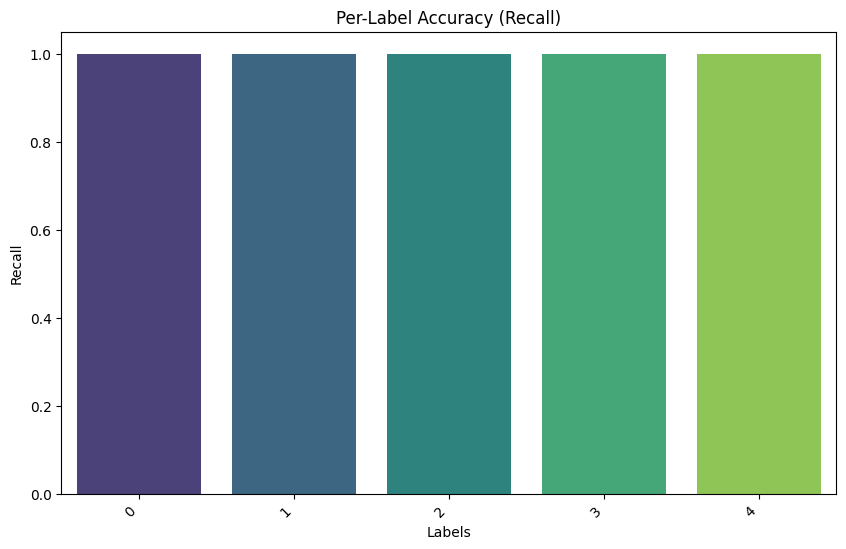

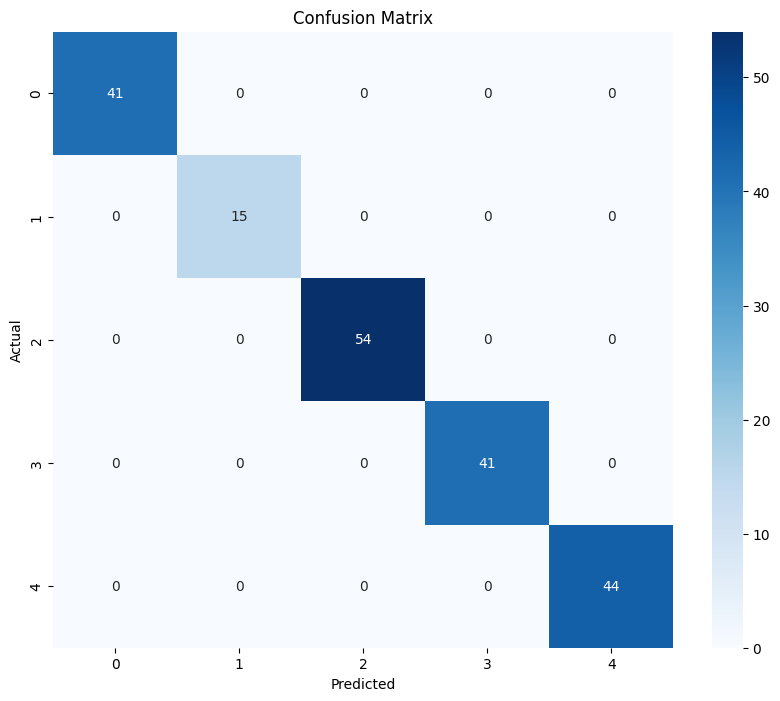

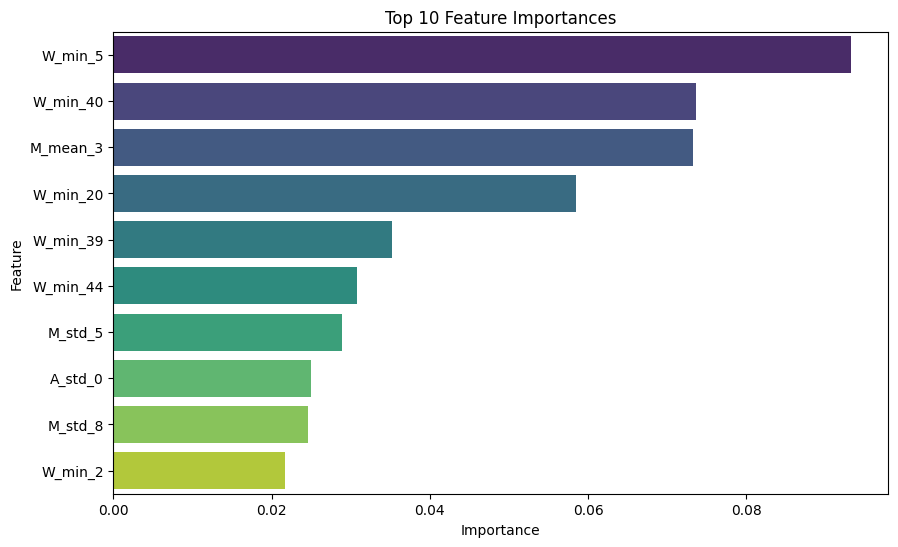

In [238]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions using the best model
y_pred = best_xgb_model.predict(X_valid)
y_valid_encoded=label_encoder.fit_transform(y_valid)

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_valid_encoded, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for per-label accuracy (precision, recall, F1-score for each label)
classification_report_dict = classification_report(y_valid_encoded, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display per-label accuracy (recall for each label)
print("\nClassification Report:\n")
print(classification_report_df)

# Plot per-label accuracy (recall)
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_report_df.index[:-3], y=classification_report_df['recall'][:-3], palette="viridis")
plt.title("Per-Label Accuracy (Recall)")
plt.xlabel("Labels")
plt.ylabel("Recall")
plt.xticks(rotation=45, ha="right")
plt.show()

# Step 4: Confusion Matrix
cm = confusion_matrix(y_valid_encoded, y_pred, labels=best_xgb_model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_xgb_model.classes_, yticklabels=best_xgb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 5: Feature Importance (Top 10)
# Get feature importances from the best model
feature_importances = best_xgb_model.feature_importances_
features = X_train.columns  # Assuming `X_train` has the original features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance and select the top 10 features
top_10_importances = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importances, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.show()


# German Time series

## import data and libraries

In [48]:
import glob, os,warnings,copy
from pathlib import Path
import pandas as pd
import h5py
warnings.filterwarnings("ignore")


In [107]:
##
directory = Path.cwd().parent.parent/"HVAC_spatial_allocation/Datasets/HP_powerTimeseries/2019_data_15min.hdf5"
class H5ls:
    def __init__(self):
        # Store an empty list for dataset names
        self.names = []
    def __call__(self, name, node):
        # only h5py datasets have dtype attribute, so we can search on this
        if hasattr(node, 'dtype') and name not in self.names:
            self.names += [name]
##
file = h5py.File(directory, 'r')
visitor = H5ls()
file.visititems(visitor)
dset_names = visitor.names

### cases with PV panel
# Load duration curves
Load_time_series=pd.DataFrame()
for i in range(len(dset_names)):
    Load_time_series[dset_names[i]]=pd.read_hdf(directory,dset_names[i]).drop(columns="index").P_TOT
##    
Load_time_series = Load_time_series.drop(columns=Load_time_series.columns[Load_time_series.columns.str.contains("MISC")])
#
start_time = pd.Timestamp('2023-01-01 00:00:00')
end_time = pd.Timestamp('2023-12-31 23:45:00')
index = pd.date_range(start=start_time, end=end_time, freq='15T')
Load_time_series.set_index(index, inplace=True)
###

# Create new columns in Load_time_series as the sum of each column and its adjacent column in Load_time_series_temp
new_columns = {
    Load_time_series.columns[i] + "TotalWithHP": Load_time_series.iloc[:, i] + Load_time_series.iloc[:, i + 1]
    for i in range(len(Load_time_series.columns) - 1)}
# Assign these new columns to Load_time_series
Load_time_series_HP = Load_time_series.filter(regex="HEATPUMP")
Load_time_series_NOHP=Load_time_series.filter(regex="HOUSEHOLD")
Load_time_series_HP=Load_time_series_HP.drop(Load_time_series_HP.columns[1::2], axis=1)
Load_time_series_NOHP=Load_time_series_NOHP.drop(Load_time_series_NOHP.columns[0::2], axis=1)
Load_time_series_all=pd.concat([Load_time_series_HP,Load_time_series_NOHP])
#####
labels = ["WITH_HP_NO_PV" if "NO_PV" in string and "HEATPUMP" in string
    else "PV+HP" if "WITH_PV" in string and "HEATPUMP" in string
    else "NONE" if "NO_PV" in string and "HOUSEHOLD" in string
    else "Only_PV" if "WITH_PV" in string and "HOUSEHOLD" in string
    else "EV_NoPV" if "EV_NoPV" in string and "HOUSEHOLD" in string
    else "Other"
    for string in Load_time_series_all.columns]
###
labels_df=pd.DataFrame(labels,columns=['label'])


## extracting features

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Define a function to extract weekly and monthly features with prefixed row names and a single 'feature' column
def extract_time_features(df, freq, prefix):
    # Calculate statistics for each period individually
    mean = df.resample(freq).mean()
    mean.index = [f"{prefix}_mean_{i}" for i in range(len(mean))]
    
    std = df.resample(freq).std()
    std.index = [f"{prefix}_std_{i}" for i in range(len(std))]
    
    skew = df.resample(freq).apply(pd.Series.skew)
    skew.index = [f"{prefix}_skew_{i}" for i in range(len(skew))]
    
    min_ = df.resample(freq).min()
    min_.index = [f"{prefix}_min_{i}" for i in range(len(min_))]
    
    max_ = df.resample(freq).max()
    max_.index = [f"{prefix}_max_{i}" for i in range(len(max_))]
    
    # Concatenate all features
    features = pd.concat([mean, std, skew, min_, max_], axis=0)
    
    # Reset the index to have 'feature' as a column and IDs as columns
    features = features.reset_index()
    features = features.rename(columns={'index': 'feature'})
    
    return features

# Extract weekly and monthly features for each ID
weekly_features = extract_time_features(Load_time_series_all, 'W', 'W')
monthly_features = extract_time_features(Load_time_series_all, 'M', 'M')
Annual_features = extract_time_features(Load_time_series_all, 'A', 'A')
# Combine weekly and monthly features into a single DataFrame
combined_features = pd.concat([weekly_features, monthly_features,Annual_features], axis=0).reset_index(drop=True)

new_column_names = combined_features['feature'].values
combined_features_temp= combined_features.drop(columns=['feature']).transpose()
combined_features_temp.columns = new_column_names
combined_features_temp=combined_features_temp.reset_index().rename(columns={'index': 'ID'})
#combined_features_temp.ID=combined_features_temp.ID.astype(int)
# Step 1: Merge features and labels
data = pd.concat([combined_features_temp, labels_df],axis=1)

# Step 2: Separate features (X) and target (y)
X = data.drop(columns=['label','ID'])
y = data['label']

# seperate part of the data for validation 
X_org, X_valid,y_org, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.25, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the counts for each category in each dataset
y_counts = y.value_counts()

# Create an index for the categories (assuming each has the same categories)
categories = y_counts.index
x = np.arange(len(categories))  # the label locations

# Set the width of each bar and figure size
width = 0.25  # the width of the bars

plt.figure(figsize=(12, 6))

# Plot each dataset's distribution with an offset for each bar group
plt.bar(x, y_counts, width, label='Test')

# Adding labels, title, and customizing the x-axis
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title("Distribution of Categories in Train, Validation, and Test Sets")
plt.xticks(x, categories, rotation=45)
plt.legend()

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

## Test old model

In [115]:
best_xgb_model.classes_


array([0, 1, 2, 3, 4])

Overall Accuracy: 0.03

Classification Report:

              precision    recall  f1-score    support
0              0.000000  0.000000  0.000000  16.000000
1              0.027778  0.500000  0.052632   2.000000
2              0.000000  0.000000  0.000000   2.000000
3              0.000000  0.000000  0.000000  17.000000
accuracy       0.027027  0.027027  0.027027   0.027027
macro avg      0.006944  0.125000  0.013158  37.000000
weighted avg   0.001502  0.027027  0.002845  37.000000


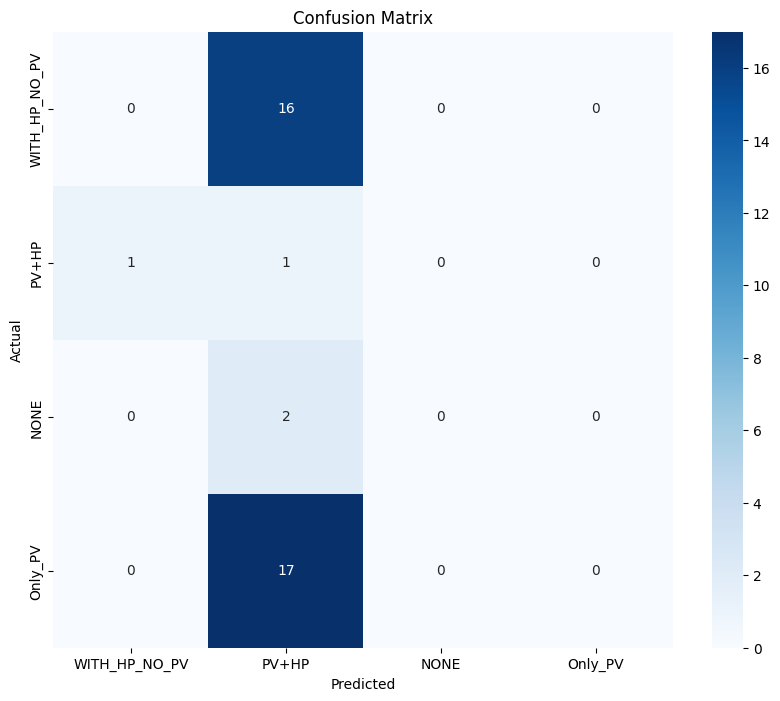

In [117]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
##########
best_xgb_model = joblib.load('best_xgb_model.joblib')
####
# Encode labels to integers
label_encoder = joblib.load('label_encoder.joblib')
y_encoded = label_encoder.fit_transform(y)

# The model developed with fluviuos data is used here
y_pred_German_FluviousModel_encoded = best_xgb_model.predict(X)
y_pred_German_FluviousModel=label_encoder.inverse_transform(y_pred_German_FluviousModel_encoded)

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_encoded, y_pred_German_FluviousModel_encoded)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for per-label accuracy (precision, recall, F1-score for each label)
classification_report_dict = classification_report(y_encoded, y_pred_German_FluviousModel_encoded, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display per-label accuracy (recall for each label)
print("\nClassification Report:\n")
print(classification_report_df)
    

# Step 4: Confusion Matrix
cm = confusion_matrix(y_encoded, y_pred_German_FluviousModel_encoded)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# No label synthetic data Synthetic data from TUW

## import data

In [1]:
import glob, os,warnings,copy
from pathlib import Path
import pandas as pd
import h5py
import numpy as np
warnings.filterwarnings("ignore")


In [2]:

directory = Path.cwd()
########## Read real data
real_time_series=pd.read_pickle(os.path.join(directory,'all_time_series_Consumption.pkl'))
real_labels_df=pd.read_pickle(os.path.join(directory,'labels_df.pkl'))
real_time_series.set_index('Datetime', inplace=True)

In [15]:
directory = Path.cwd().parent.parent/"HVAC_spatial_allocation/Datasets/Synthetic_timeSeries/TUW_synthetic/physics_informed/Total_dataset_synthesized_2.csv"
synthetic_timeSeries=pd.read_csv(directory,sep=';')
synthetic_timeSeries['0']=pd.to_datetime(synthetic_timeSeries['0'])
synthetic_timeSeries.set_index('0', inplace=True)
#synthetic_timeSeries.columns = [str(col-1) for col in synthetic_timeSeries.columns]
synthetic_timeSeries.index.name = 'Date'

## Features

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Define a function to extract weekly and monthly features with prefixed row names and a single 'feature' column
def extract_time_features(df, freq, prefix):
    # Calculate statistics for each period individually
    mean = df.resample(freq).mean()
    mean.index = [f"{prefix}_mean_{i}" for i in range(len(mean))]
    
    std = df.resample(freq).std()
    std.index = [f"{prefix}_std_{i}" for i in range(len(std))]
    
    skew = df.resample(freq).apply(pd.Series.skew)
    skew.index = [f"{prefix}_skew_{i}" for i in range(len(skew))]
    
    min_ = df.resample(freq).min()
    min_.index = [f"{prefix}_min_{i}" for i in range(len(min_))]
    
    max_ = df.resample(freq).max()
    max_.index = [f"{prefix}_max_{i}" for i in range(len(max_))]
    
    # Concatenate all features
    features = pd.concat([mean, std, skew, min_, max_], axis=0)
    
    # Reset the index to have 'feature' as a column and IDs as columns
    features = features.reset_index()
    features = features.rename(columns={'index': 'feature'})
    
    return features

# Extract weekly and monthly features for each ID
weekly_features = extract_time_features(synthetic_timeSeries, 'W', 'W')
monthly_features = extract_time_features(synthetic_timeSeries, 'M', 'M')
Annual_features = extract_time_features(synthetic_timeSeries, 'A', 'A')
# Combine weekly and monthly features into a single DataFrame
combined_features = pd.concat([weekly_features, monthly_features,Annual_features], axis=0).reset_index(drop=True)

new_column_names = combined_features['feature'].values
combined_features_temp= combined_features.drop(columns=['feature']).transpose()
combined_features_temp.columns = new_column_names
combined_features_temp=combined_features_temp.reset_index().rename(columns={'index': 'ID'})
combined_features_temp.ID=combined_features_temp.ID.astype(int)
# Step 1: Merge features and labels (not needed but to keeo it consistent with the real data flow)
data_synthetic = pd.merge(combined_features_temp, real_labels_df[['ID', 'Category']], on='ID')
# Step 2: Separate features (X) and target (y)
X = data_synthetic.drop(columns=['Category','ID'])
y = data_synthetic['Category']


## Test time series

In [17]:
import joblib
##########
best_xgb_model = joblib.load('best_xgb_model.joblib')
####
# Encode labels to integers
label_encoder = joblib.load('label_encoder.joblib')
#y_real_encoded = label_encoder.fit_transform(y)

# The model developed with fluviuos data is used here
y_pred_synthetic = best_xgb_model.predict(X.astype(float))
y_pred_Labels=pd.DataFrame(label_encoder.inverse_transform(y_pred_synthetic))


## Visualization

In [13]:
y_counts_nonConditioned_1=copy.copy(y_counts_nonConditioned)

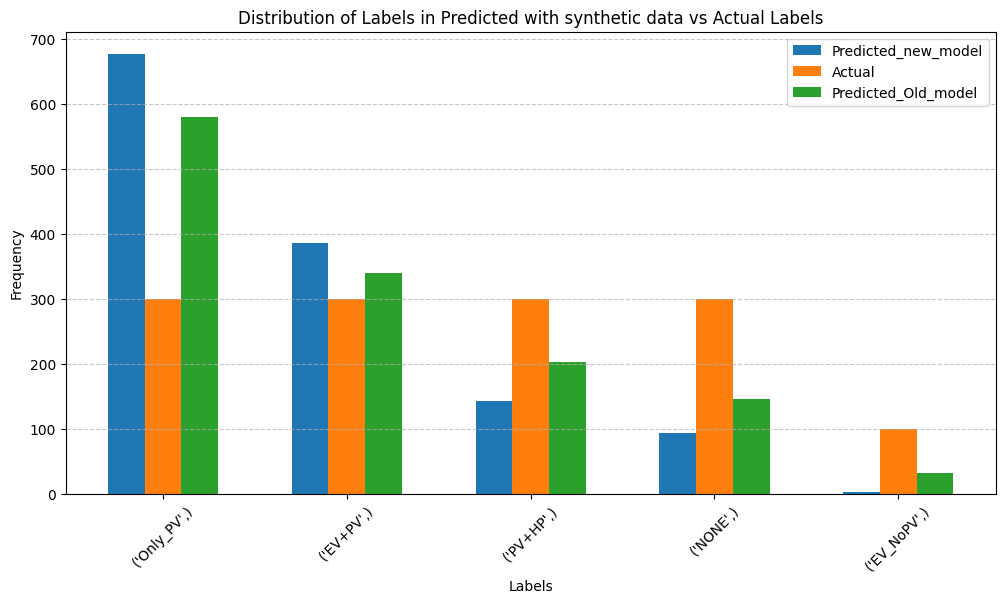

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the counts for each category in each dataset
y_counts_nonConditioned = y_pred_Labels.value_counts()
y_real = real_labels_df['Category'].value_counts()

# Create an index for the categories (assuming each has the same categories)
categories = y_counts_nonConditioned.index
x = np.arange(len(categories))  # the label locations

# Set the width of each bar and figure size
width = 0.2  # the width of the bars

plt.figure(figsize=(12, 6))

# Plot each dataset's distribution with an offset for each bar group
plt.bar(x - width, y_counts_nonConditioned, width, label='Predicted_new_model')
plt.bar(x , y_real, width, label='Actual')
plt.bar(x + width, y_counts_nonConditioned_1, width, label='Predicted_Old_model')


# Adding labels, title, and customizing the x-axis
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title("Distribution of Labels in Predicted with synthetic data vs Actual Labels")
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


## Outputs analysis

Overall Accuracy: 0.21

Classification Report:

              precision    recall  f1-score      support
0              0.229452  0.224080  0.226734   299.000000
1              0.068182  0.030000  0.041667   100.000000
2              0.193416  0.156667  0.173112   300.000000
3              0.216590  0.313333  0.256131   300.000000
4              0.220280  0.210000  0.215017   300.000000
accuracy       0.210931  0.210931  0.210931     0.210931
macro avg      0.185584  0.186816  0.182532  1299.000000
weighted avg   0.203626  0.210931  0.204187  1299.000000


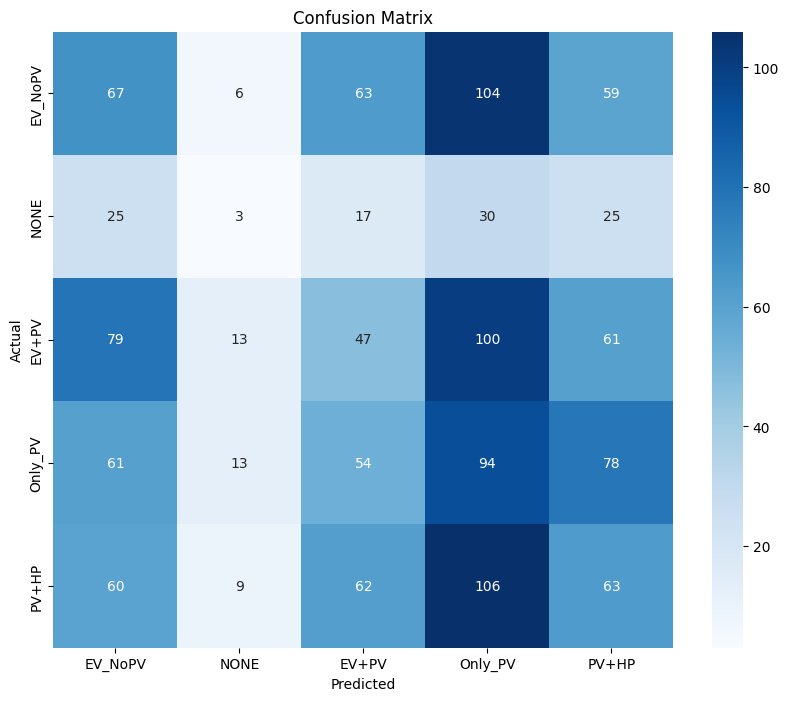

In [190]:

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_real_encoded, y_pred_synthetic)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for per-label accuracy (precision, recall, F1-score for each label)
classification_report_dict = classification_report(y_real_encoded, y_pred_synthetic, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display per-label accuracy (recall for each label)
print("\nClassification Report:\n")
print(classification_report_df)

# Step 4: Confusion Matrix
cm = confusion_matrix(y_real_encoded, y_pred_synthetic)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Labeled synthetic data from TUW

## Import data

In [241]:
import glob, os,warnings,copy
from pathlib import Path
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

In [242]:

directory = Path.cwd()
########## Read real data
real_time_series=pd.read_pickle(os.path.join(directory,'all_time_series_Consumption.pkl'))
real_labels_df=pd.read_pickle(os.path.join(directory,'labels_df.pkl'))
real_time_series.set_index('Datetime', inplace=True)

In [243]:
def extract_label(path):
    # Get the part after the double slash
    label = path.split("\\")[-1]
    # Remove the .csv extension
    label = os.path.splitext(label)[0]
    return label

In [244]:
directory = Path.cwd().parent.parent/"HVAC_spatial_allocation/Datasets/Synthetic_timeSeries/TUW_synthetic/physics_informed/labeled/"
warnings.filterwarnings("ignore")
csv_files=glob.glob(os.path.join(directory, "*.csv"))
synthetic_timeSeries=pd.DataFrame()
labels_df=pd.DataFrame(columns=['Category','ID'])
column_counter=1
for file in csv_files:
    synthetic_timeSeries_tmp=pd.read_csv(file,sep=';').drop(columns=['type'])
    num_columns = len(synthetic_timeSeries.columns)
    num_columns_tmp=len(synthetic_timeSeries_tmp.columns)

    synthetic_timeSeries_tmp.columns = [f"{i}" for i in range(num_columns+1, num_columns + num_columns_tmp+1)]
    synthetic_timeSeries=pd.concat([synthetic_timeSeries,synthetic_timeSeries_tmp], axis=1)
    
    temp_labels = pd.DataFrame({
        'Category': extract_label(file),
        'ID': synthetic_timeSeries_tmp.columns
    })
    labels_df = pd.concat([labels_df, temp_labels], ignore_index=True)
labels_df['ID']=synthetic_timeSeries.columns
labels_df.ID=labels_df.ID.astype(str)
#####
synthetic_timeSeries.index = pd.date_range(start='2023-01-01', periods=len(synthetic_timeSeries), freq='h')

In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Define a function to extract weekly and monthly features with prefixed row names and a single 'feature' column
def extract_time_features(df, freq, prefix):
    # Calculate statistics for each period individually
    mean = df.resample(freq).mean()
    mean.index = [f"{prefix}_mean_{i}" for i in range(len(mean))]
    
    std = df.resample(freq).std()
    std.index = [f"{prefix}_std_{i}" for i in range(len(std))]
    
    skew = df.resample(freq).apply(pd.Series.skew)
    skew.index = [f"{prefix}_skew_{i}" for i in range(len(skew))]
    
    min_ = df.resample(freq).min()
    min_.index = [f"{prefix}_min_{i}" for i in range(len(min_))]
    
    max_ = df.resample(freq).max()
    max_.index = [f"{prefix}_max_{i}" for i in range(len(max_))]
    
    # Concatenate all features
    features = pd.concat([mean, std, skew, min_, max_], axis=0)
    
    # Reset the index to have 'feature' as a column and IDs as columns
    features = features.reset_index()
    features = features.rename(columns={'index': 'feature'})
    
    return features

# Extract weekly and monthly features for each ID
weekly_features = extract_time_features(synthetic_timeSeries, 'W', 'W')
monthly_features = extract_time_features(synthetic_timeSeries, 'M', 'M')
Annual_features = extract_time_features(synthetic_timeSeries, 'A', 'A')
# Combine weekly and monthly features into a single DataFrame
combined_features = pd.concat([weekly_features, monthly_features,Annual_features], axis=0).reset_index(drop=True)

new_column_names = combined_features['feature'].values
combined_features_temp= combined_features.drop(columns=['feature']).transpose()
combined_features_temp.columns = new_column_names
combined_features_temp=combined_features_temp.reset_index().rename(columns={'index': 'ID'})
combined_features_temp.ID=combined_features_temp.ID.astype(str)
# Step 1: Merge features and labels (not needed but to keeo it consistent with the real data flow)
data_synthetic = pd.merge(combined_features_temp, labels_df[['ID', 'Category']], on='ID')

# Step 2: Separate features (X) and target (y)
X = data_synthetic.drop(columns=['Category','ID'])
y = data_synthetic['Category']


## Test previous model

In [246]:
import joblib
##########
best_xgb_model = joblib.load('best_xgb_model.joblib')
####
# Encode labels to integers
label_encoder = joblib.load('label_encoder.joblib')
# Predict using the trained model
y_pred_synthetic = best_xgb_model.predict(X)

# Convert predicted labels back to original string labels
y_pred_labels = pd.DataFrame(label_encoder.inverse_transform(y_pred_synthetic))

### Visualization

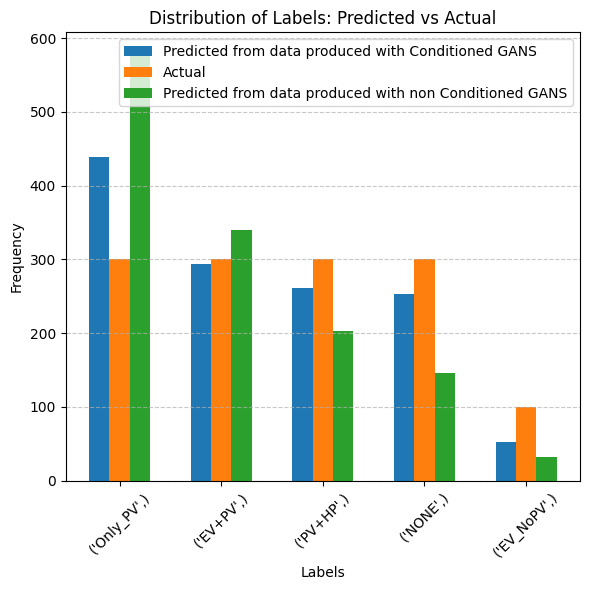

In [254]:
import matplotlib.pyplot as plt
import numpy as np

# Count label occurrences
y_counts_conditioned = y_pred_labels.value_counts()
y_real = labels_df['Category'].value_counts()
# Align actual counts with predicted label order
categories = y_counts.index

# Bar positions
x = np.arange(len(categories))
width = 0.2

# Plot
plt.figure(figsize=(6, 6))
plt.bar(x - width, y_counts_conditioned, width, label='Predicted from data produced with Conditioned GANS')
plt.bar(x, y_real, width, label='Actual')
plt.bar(x + width, y_counts_nonConditioned, width, label='Predicted from data produced with non Conditioned GANS')
#
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels: Predicted vs Actual')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [95]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,feature_importances_
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_pred_synthetic, y_real_encoded)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for per-label accuracy (precision, recall, F1-score for each label)
classification_report_dict = classification_report(y_pred_synthetic, y_real_encoded, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display per-label accuracy (recall for each label)
print("\nClassification Report:\n")
print(classification_report_df)

# Plot per-label accuracy (recall)
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_report_df.index[:-3], y=classification_report_df['recall'][:-3], palette="viridis")
plt.title("Per-Label Accuracy (Recall)")
plt.xlabel("Labels")
plt.ylabel("Recall")
plt.xticks(rotation=45, ha="right")
plt.show()

# Step 4: Confusion Matrix
cm = confusion_matrix(y_pred_synthetic, y_real_encoded, labels=best_xgb_model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_xgb_model.classes_, yticklabels=best_xgb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 5: Feature Importance (Top 10)
# Get feature importances from the best model
feature_importances = best_xgb_model.feature_importances_
features = X_train.columns  # Assuming `X_train` has the original features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance and select the top 10 features
top_10_importances = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importances, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.show()


ImportError: cannot import name 'feature_importances_' from 'sklearn.metrics' (C:\Users\SHARIFIM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\__init__.py)

## Model training

In [176]:
import numpy as np
import joblib
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
####

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
####
X_train_org, X_test_org, y_train_encoded_org, y_test_encoded_org = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded )

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_accuracy = 0
best_xgb_model = None  # Placeholder for the best model

# K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split data into training and validation sets for this fold
    X_train_org, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_encoded_org, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the XGBoost model
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = xgb_model.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this is the best model so far
    if fold_accuracy > best_accuracy:
        best_accuracy = fold_accuracy
        best_xgb_model = xgb_model  # Store the model with the best accuracy

    print(f"Fold {fold + 1} Accuracy: {fold_accuracy:.2f}")

# After cross-validation, save the best model to a file
joblib.dump(best_xgb_model, 'best_xgb_model.joblib')
print(f"Best Fold Accuracy: {best_accuracy:.2f}")


Fold 1 Accuracy: 1.00
Fold 2 Accuracy: 1.00
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 0.93
Best Fold Accuracy: 1.00


## Visualization

Overall Accuracy: 0.98

Classification Report:

              precision    recall  f1-score     support
0              0.967213  0.983333  0.975207   60.000000
1              1.000000  0.950000  0.974359   20.000000
2              1.000000  1.000000  1.000000   60.000000
3              0.983051  0.966667  0.974790   60.000000
4              0.983607  1.000000  0.991736   60.000000
accuracy       0.984615  0.984615  0.984615    0.984615
macro avg      0.986774  0.980000  0.983218  260.000000
weighted avg   0.984739  0.984615  0.984581  260.000000


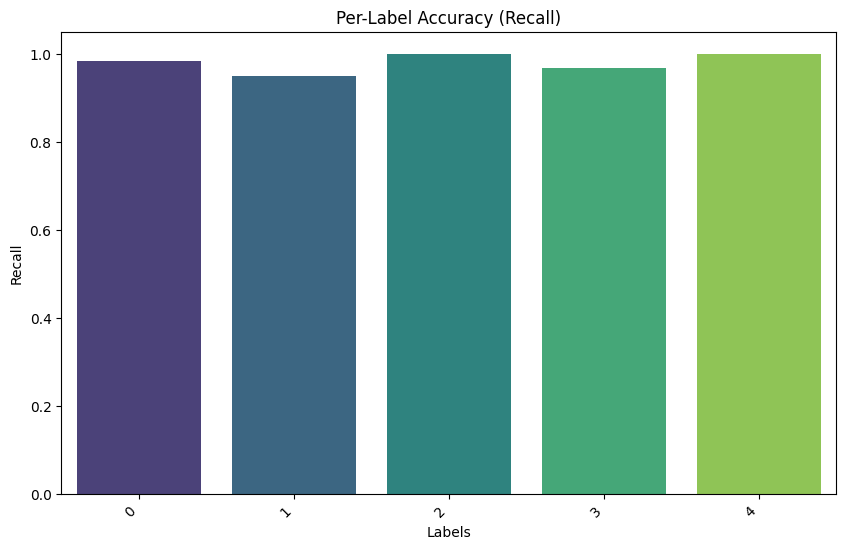

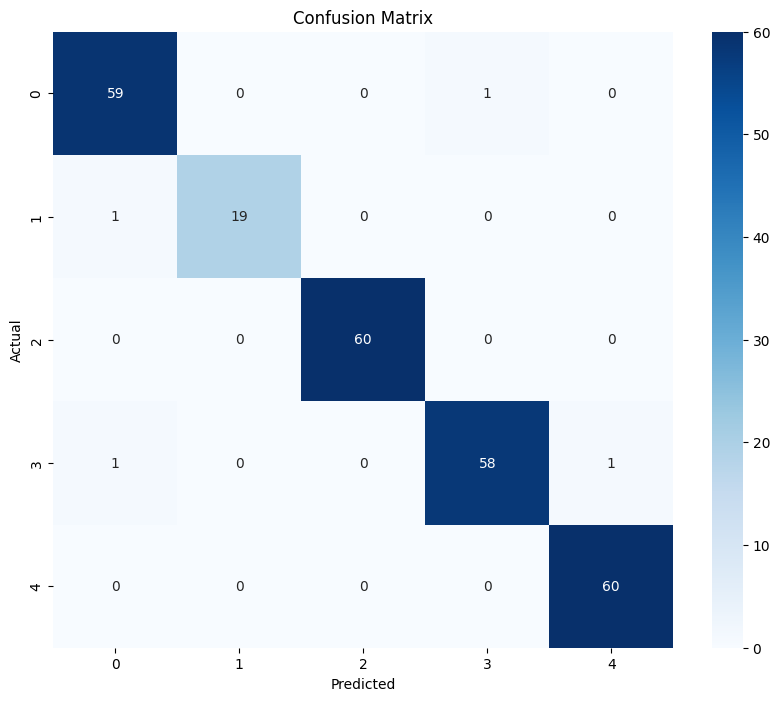

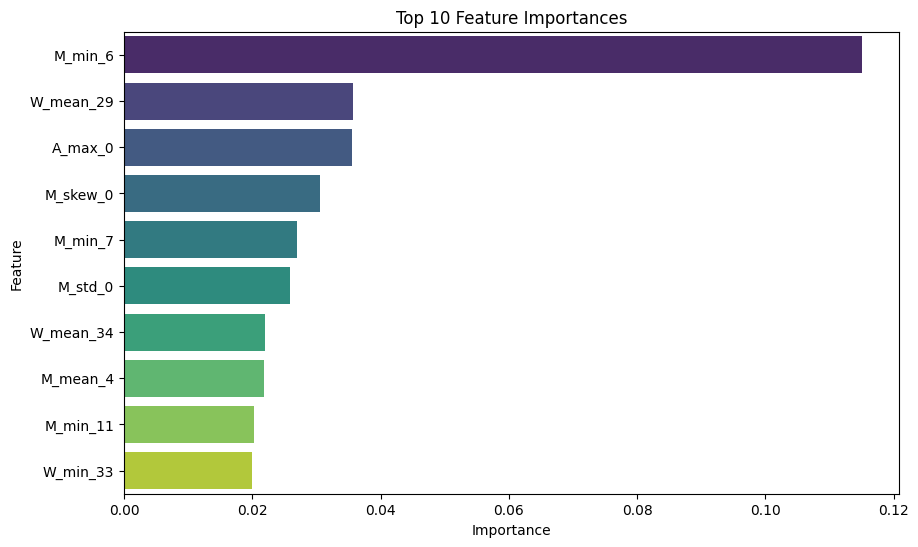

In [154]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions using the best model
y_pred = best_xgb_model.predict(X_test_org)

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_test_encoded_org, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for per-label accuracy (precision, recall, F1-score for each label)
classification_report_dict = classification_report(y_test_encoded_org, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display per-label accuracy (recall for each label)
print("\nClassification Report:\n")
print(classification_report_df)

# Plot per-label accuracy (recall)
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_report_df.index[:-3], y=classification_report_df['recall'][:-3], palette="viridis")
plt.title("Per-Label Accuracy (Recall)")
plt.xlabel("Labels")
plt.ylabel("Recall")
plt.xticks(rotation=45, ha="right")
plt.show()

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test_encoded_org, y_pred, labels=best_xgb_model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_xgb_model.classes_, yticklabels=best_xgb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 5: Feature Importance (Top 10)
# Get feature importances from the best model
feature_importances = best_xgb_model.feature_importances_
features = X_train.columns  # Assuming `X_train` has the original features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance and select the top 10 features
top_10_importances = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importances, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.show()


In [159]:
import os
from pathlib import Path
import pandas as pd
directory = Path.cwd()
time_series_Consumption_real=pd.read_pickle(os.path.join(directory,'all_time_series_Consumption.pkl'))
labels_df_real=pd.read_pickle(os.path.join(directory,'labels_df.pkl'))
labels_df_real.ID=labels_df_real.ID.astype(str)

## test with real data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Define a function to extract weekly and monthly features with prefixed row names and a single 'feature' column
def extract_time_features(df, freq, prefix):
    # Calculate statistics for each period individually
    mean = df.resample(freq).mean()
    mean.index = [f"{prefix}_mean_{i}" for i in range(len(mean))]
    
    std = df.resample(freq).std()
    std.index = [f"{prefix}_std_{i}" for i in range(len(std))]
    
    skew = df.resample(freq).apply(pd.Series.skew)
    skew.index = [f"{prefix}_skew_{i}" for i in range(len(skew))]
    
    min_ = df.resample(freq).min()
    min_.index = [f"{prefix}_min_{i}" for i in range(len(min_))]
    
    max_ = df.resample(freq).max()
    max_.index = [f"{prefix}_max_{i}" for i in range(len(max_))]
    
    # Concatenate all features
    features = pd.concat([mean, std, skew, min_, max_], axis=0)
    
    # Reset the index to have 'feature' as a column and IDs as columns
    features = features.reset_index()
    features = features.rename(columns={'index': 'feature'})
    
    return features

# Extract weekly and monthly features for each ID
weekly_features = extract_time_features(synthetic_timeSeries, 'W', 'W')
monthly_features = extract_time_features(synthetic_timeSeries, 'M', 'M')
Annual_features = extract_time_features(synthetic_timeSeries, 'A', 'A')
# Combine weekly and monthly features into a single DataFrame
combined_features = pd.concat([weekly_features, monthly_features,Annual_features], axis=0).reset_index(drop=True)

new_column_names = combined_features['feature'].values
combined_features_temp= combined_features.drop(columns=['feature']).transpose()
combined_features_temp.columns = new_column_names
combined_features_temp=combined_features_temp.reset_index().rename(columns={'index': 'ID'})
combined_features_temp.ID=combined_features_temp.ID.astype(str)
# Step 1: Merge features and labels (not needed but to keeo it consistent with the real data flow)
data_real = pd.merge(combined_features_temp, labels_df_real[['ID', 'Category']], on='ID')

# Step 2: Separate features (X) and target (y)
X_real = data_real.drop(columns=['Category','ID'])
y_real = data_real['Category']

In [178]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("LabelEncoder Mapping:")
for original, encoded in class_mapping.items():
    print(f"{original} -> {encoded}")

LabelEncoder Mapping:
EV+PV -> 0
EV_NoPV -> 1
None -> 2
Only_PV -> 3
PV+HP -> 4


## Visualization

Overall Accuracy: 0.99

Classification Report:

              precision    recall  f1-score      support
EV+PV          0.983498  0.993333  0.988391   300.000000
EV_NoPV        1.000000  0.970000  0.984772   100.000000
None           0.990099  1.000000  0.995025   300.000000
Only_PV        0.976667  0.976667  0.976667   300.000000
PV+HP          0.986532  0.976667  0.981575   300.000000
accuracy       0.985385  0.985385  0.985385     0.985385
macro avg      0.987359  0.983333  0.985286  1300.000000
weighted avg   0.985414  0.985385  0.985365  1300.000000


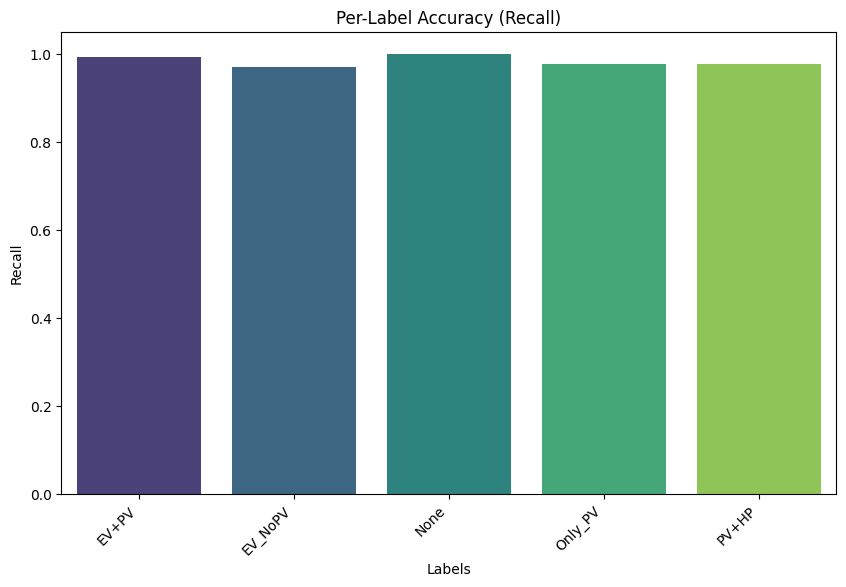

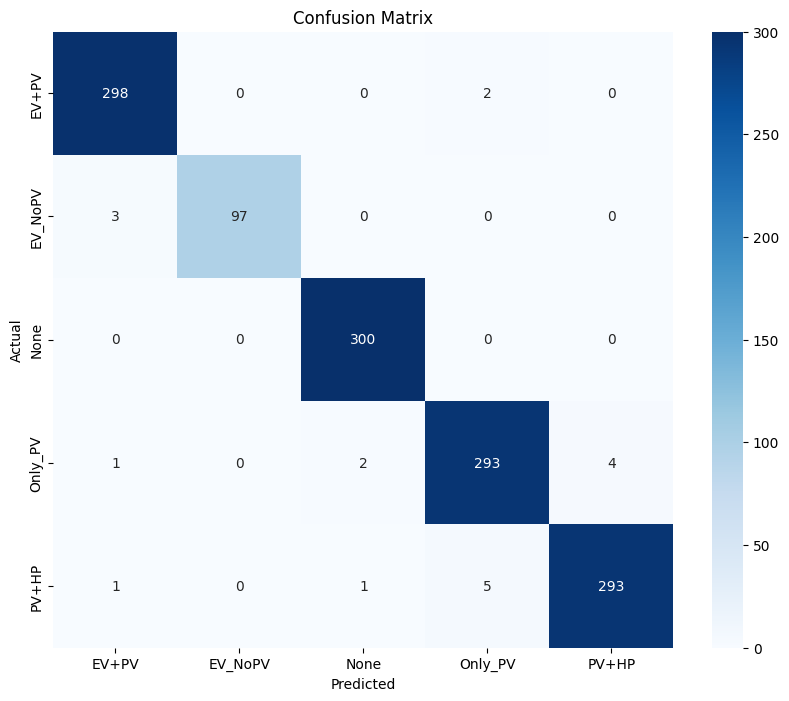

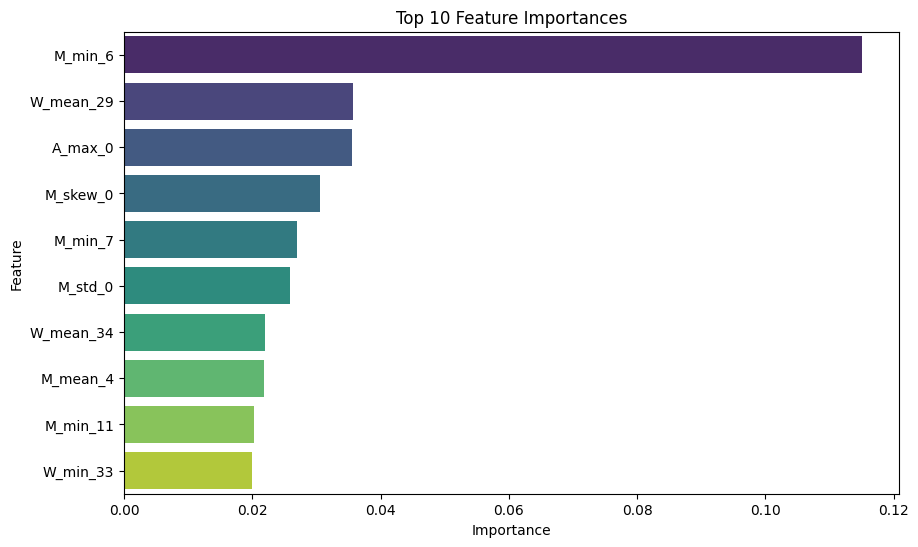

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `label_encoder` has been fitted on the original `y` during training

# Step 1: Decode the encoded true labels and predicted labels
y_true = label_encoder.inverse_transform(y_encoded)  # Decode y_encoded to original labels
y_pred_labels = label_encoder.inverse_transform(y_encoded_real)  # Decode y_pred to original labels

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred_labels)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for per-label accuracy (using original labels)
classification_report_dict = classification_report(y_true, y_pred_labels, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display per-label accuracy (recall for each label)
print("\nClassification Report:\n")
print(classification_report_df)

# Plot per-label accuracy (recall)
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_report_df.index[:-3], y=classification_report_df['recall'][:-3], palette="viridis")
plt.title("Per-Label Accuracy (Recall)")
plt.xlabel("Labels")
plt.ylabel("Recall")
plt.xticks(rotation=45, ha="right")
plt.show()

# Step 4: Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 5: Feature Importance (Top 10)
# Get feature importances from the best model
feature_importances = best_xgb_model.feature_importances_
features = X_train.columns  # Assuming `X_train` has the original features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance and select the top 10 features
top_10_importances = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importances, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.show()


# Comparison between synthetic and real data

In [1]:
import glob, os,warnings
from pathlib import Path
import pandas as pd
warnings.filterwarnings("ignore")

## Read real and synthetic data

In [65]:

directory = Path.cwd()
########## Read real data
real_time_series=pd.read_pickle(os.path.join(directory,'all_time_series_Consumption.pkl'))
real_labels_df=pd.read_pickle(os.path.join(directory,'labels_df.pkl'))
real_time_series.set_index('Datetime', inplace=True)

In [66]:
directory = Path.cwd()
directory = Path.cwd().parent.parent/"HVAC_spatial_allocation/Datasets/Synthetic_timeSeries/TUW_synthetic/physics_informed/"
csv_files=glob.glob(os.path.join(directory, "*.csv"))
synthetic_timeSeries=pd.DataFrame()
synthetic_labels_df=pd.DataFrame(columns=['Category','ID'])

In [72]:
synthetic_timeSeries_tmp=pd.read_csv(file,sep=';')
synthetic_timeSeries_tmp

,0,1,2,3,4,5,6,7,8,9,...,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300
0,2022-01-01 00:00:00,0.249503,0.430624,0.150308,0.201742,0.134304,0.107448,0.264043,0.086110,0.311731,...,0.443151,0.054843,0.561165,0.206218,0.143813,0.386302,0.148727,0.168100,0.542581,0.085683
1,2022-01-01 01:00:00,0.192466,0.301519,0.104060,0.262333,0.113110,0.271310,0.199149,0.113336,0.273111,...,0.318823,0.033884,0.661595,0.092586,0.174828,0.448329,0.129653,0.151477,0.683306,0.085147
2,2022-01-01 02:00:00,0.145730,0.289369,0.071101,0.255823,0.146884,0.246814,0.146850,0.074416,0.290459,...,0.250446,0.034419,0.516240,0.067968,0.270333,0.364586,0.089780,0.158613,0.867571,0.047451
3,2022-01-01 03:00:00,0.204980,0.359429,0.050402,0.663504,0.271479,0.288373,0.152733,0.066343,0.346177,...,0.140137,0.026222,0.908728,0.068235,0.369602,0.337933,0.106768,0.145447,0.377441,0.049038
4,2022-01-01 04:00:00,0.246472,0.339922,0.059528,0.720617,0.271336,0.388850,0.181870,0.062104,0.357969,...,0.109290,0.038351,0.813900,0.076964,0.249926,0.398183,0.105716,0.099852,0.327137,0.048960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,0.231943,0.082934,0.068087,0.086480,0.316427,0.345007,0.183602,0.171081,0.178412,...,0.224302,0.152914,0.049820,0.215996,0.028475,0.237032,0.207261,0.075493,0.177164,0.105372
8756,2022-12-31 20:00:00,0.110035,0.241269,0.037699,0.067592,0.098702,0.402015,0.156076,0.795603,0.101837,...,0.668975,0.142954,0.084384,0.259598,0.032003,0.162513,0.225984,0.028446,0.021518,0.236314
8757,2022-12-31 21:00:00,0.087364,0.401145,0.080717,0.187431,0.127346,0.208461,0.221429,0.251849,0.115800,...,0.503530,0.072011,0.117763,0.379869,0.033774,0.145033,0.180303,0.013986,0.022437,0.125077
8758,2022-12-31 22:00:00,0.060460,0.072199,0.032235,0.608743,0.424209,0.067020,0.134123,0.080095,0.051598,...,0.310617,0.051565,0.029715,0.906433,0.067702,0.039138,0.100241,0.013890,0.518147,0.130635


In [ ]:

##### Synthetic data
directory = Path.cwd().parent.parent/"HVAC_spatial_allocation/Datasets/Synthetic_timeSeries/TUW_synthetic/physics_informed/"
csv_files=glob.glob(os.path.join(directory, "*.csv"))
synthetic_timeSeries=pd.DataFrame()
synthetic_labels_df=pd.DataFrame(columns=['Category','ID'])
column_counter=1
for file in csv_files:
    synthetic_timeSeries_tmp=pd.read_csv(file,sep=';').drop(columns=['0'])

    num_columns = len(synthetic_timeSeries.columns)
    num_columns_tmp=len(synthetic_timeSeries_tmp.columns)

    synthetic_timeSeries_tmp.columns = [f"{i}" for i in range(num_columns+1, num_columns + num_columns_tmp+1)]
    synthetic_timeSeries=pd.concat([synthetic_timeSeries,synthetic_timeSeries_tmp], axis=1)
    
    temp_labels = pd.DataFrame({
        'Category': [file[191:-14]] * num_columns_tmp,
        'ID': synthetic_timeSeries_tmp.columns
    })
    synthetic_labels_df = pd.concat([synthetic_labels_df, temp_labels], ignore_index=True)
synthetic_labels_df['ID']=synthetic_timeSeries.columns
synthetic_labels_df.ID=synthetic_labels_df.ID.astype(int)

synthetic_timeSeries.index = pd.date_range(start='2023-01-01', periods=len(synthetic_timeSeries), freq='h')


## Features extraction

In [4]:
# Define a function to extract weekly and monthly features with prefixed row names and a single 'feature' column
def extract_time_features(df, freq, prefix):
    # Calculate statistics for each period individually
    mean = df.resample(freq).mean()
    mean.index = [f"{prefix}_mean_{i}" for i in range(len(mean))]
    
    std = df.resample(freq).std()
    std.index = [f"{prefix}_std_{i}" for i in range(len(std))]
    
    skew = df.resample(freq).apply(pd.Series.skew)
    skew.index = [f"{prefix}_skew_{i}" for i in range(len(skew))]
    
    min_ = df.resample(freq).min()
    min_.index = [f"{prefix}_min_{i}" for i in range(len(min_))]
    
    max_ = df.resample(freq).max()
    max_.index = [f"{prefix}_max_{i}" for i in range(len(max_))]
    
    # Concatenate all features
    features = pd.concat([mean, std, skew, min_, max_], axis=0)
    
    # Reset the index to have 'feature' as a column and IDs as columns
    features = features.reset_index()
    features = features.rename(columns={'index': 'feature'})
    
    return features


In [5]:
####### #######
######### ######## Real data
# Extract weekly and monthly features for each ID
weekly_features = extract_time_features(real_time_series, 'W', 'W')
monthly_features = extract_time_features(real_time_series, 'M', 'M')
Annual_features = extract_time_features(real_time_series, 'A', 'A')
Daily_features = extract_time_features(real_time_series, 'D', 'D')
Daily_features = extract_time_features(real_time_series, 'D', 'D')
# Combine weekly and monthly features into a single DataFrame
combined_features = pd.concat([Daily_features,weekly_features, monthly_features,Annual_features], axis=0).reset_index(drop=True)

new_column_names = combined_features['feature'].values
combined_features_temp= combined_features.drop(columns=['feature']).transpose()
combined_features_temp.columns = new_column_names
combined_features_temp=combined_features_temp.reset_index().rename(columns={'index': 'ID'})
combined_features_temp.ID=combined_features_temp.ID.astype(int)
# Step 1: Merge features and labels
data_real = pd.merge(combined_features_temp, real_labels_df[['ID', 'Category']], on='ID')

# Step 2: Separate features (X) and target (y)
X_real = data_real.drop(columns=['Category','ID'])
y_real = data_real['Category']
####### #######
######### ######## Synthetic data
############ ############## #######
# Extract weekly and monthly features for each ID
weekly_features = extract_time_features(synthetic_timeSeries, 'W', 'W')
monthly_features = extract_time_features(synthetic_timeSeries, 'M', 'M')
Annual_features = extract_time_features(synthetic_timeSeries, 'A', 'A')
Daily_features = extract_time_features(synthetic_timeSeries, 'D', 'D')
# Combine weekly and monthly features into a single DataFrame
combined_features = pd.concat([Daily_features,weekly_features, monthly_features,Annual_features], axis=0).reset_index(drop=True)

new_column_names = combined_features['feature'].values
combined_features_temp= combined_features.drop(columns=['feature']).transpose()
combined_features_temp.columns = new_column_names
combined_features_temp=combined_features_temp.reset_index().rename(columns={'index': 'ID'})
combined_features_temp.ID=combined_features_temp.ID.astype(int)
# Step 1: Merge features and labels
data_synthetic = pd.merge(combined_features_temp, synthetic_labels_df[['ID', 'Category']], on='ID')

# Step 2: Separate features (X) and target (y)
X_synthetic = data_synthetic.drop(columns=['Category','ID'])
y_synthetic = data_synthetic['Category']
###
data=pd.merge(data_synthetic, data_real, on='ID',  suffixes=('_synthetic', '_real'))

## Data preperation

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
X_trainTest_synthetic, X_valid_synthetic, y_trainTest_synthetic, y_valid_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=50)
X_trainTest_real, X_valid_real, y_trainTest_real, y_valid_real = train_test_split(X_real, y_real, test_size=0.2, random_state=50)

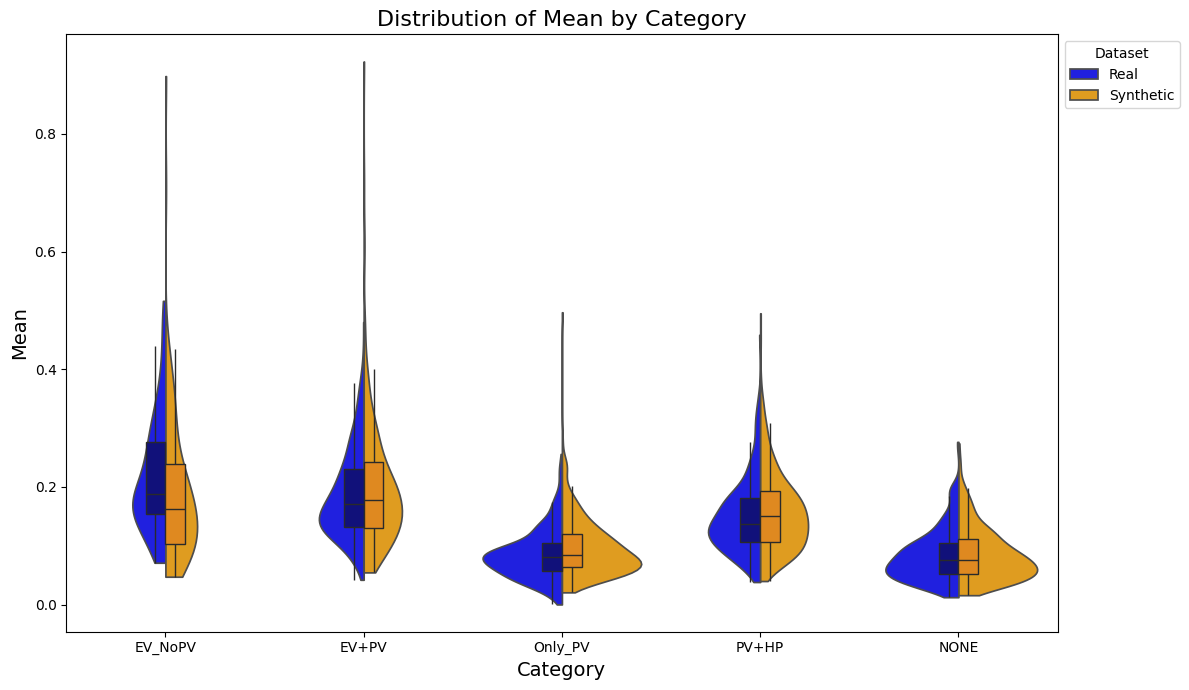

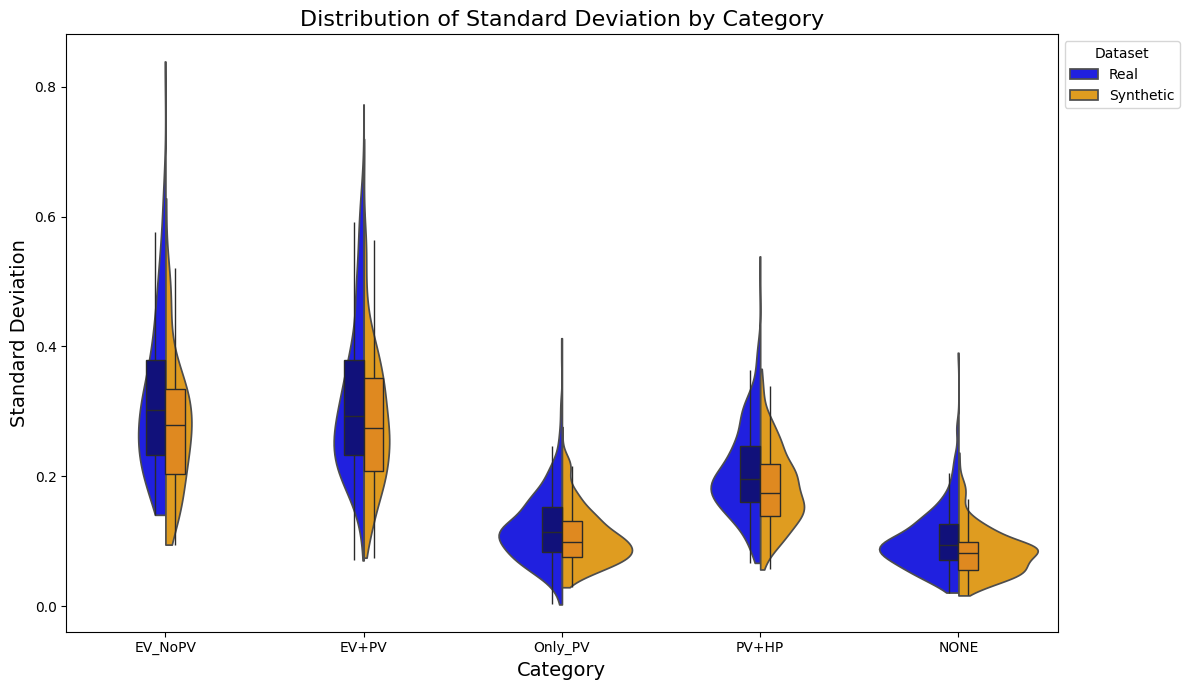

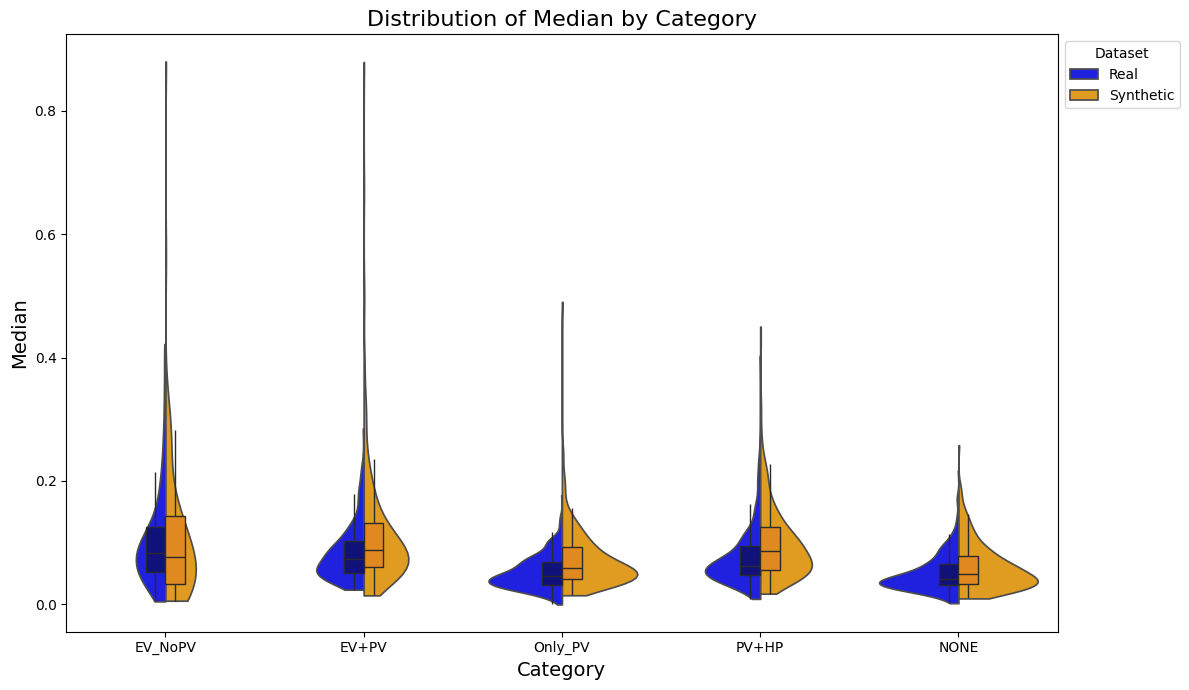

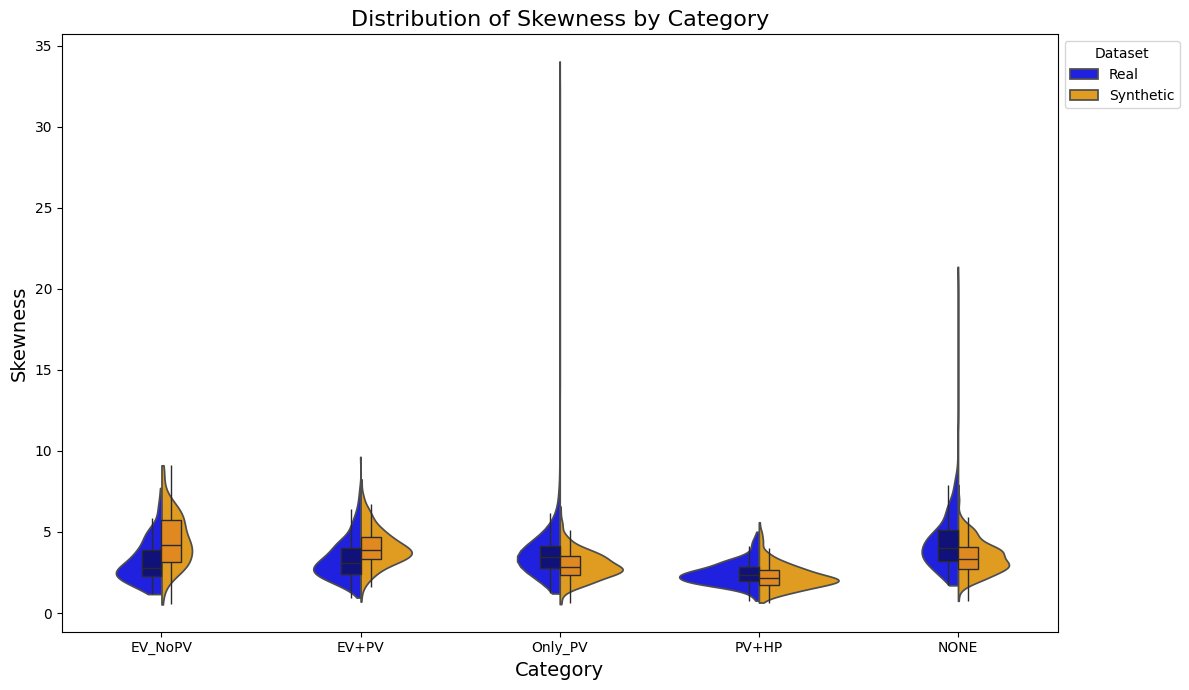

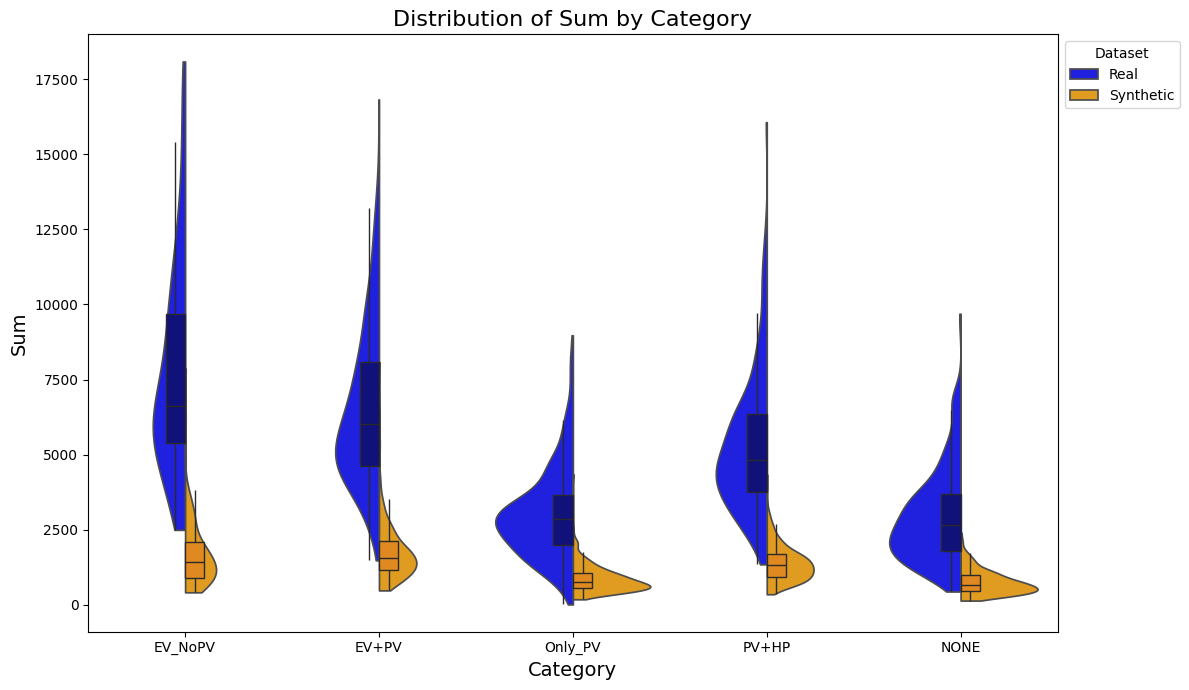

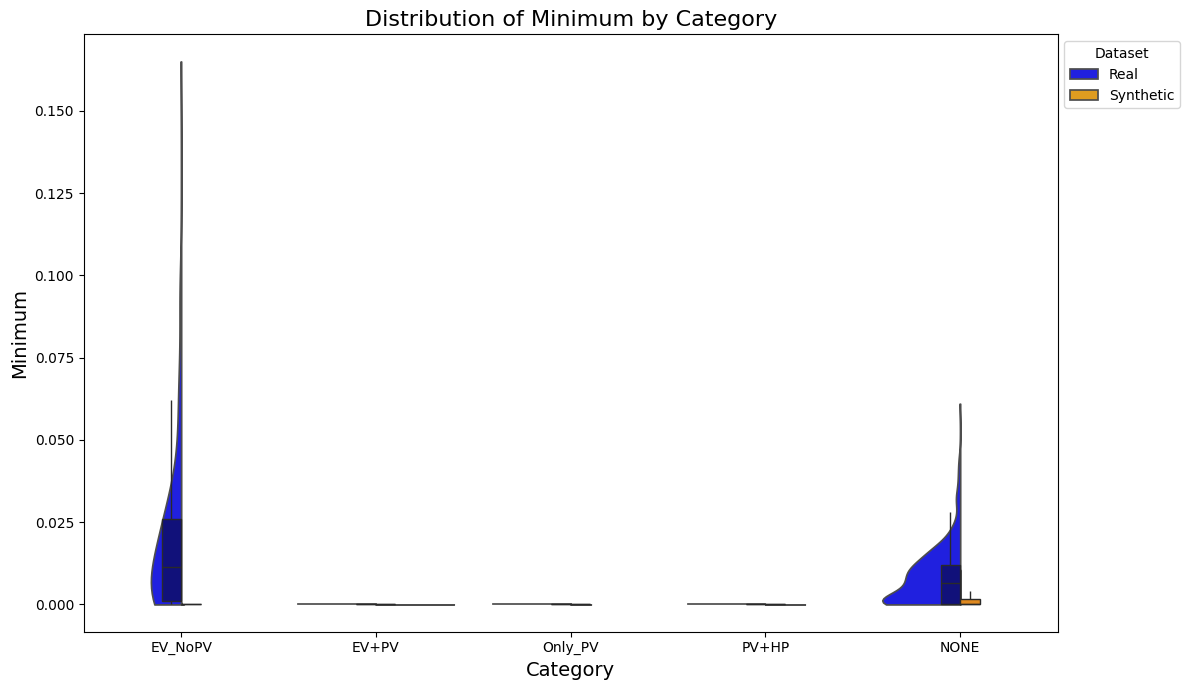

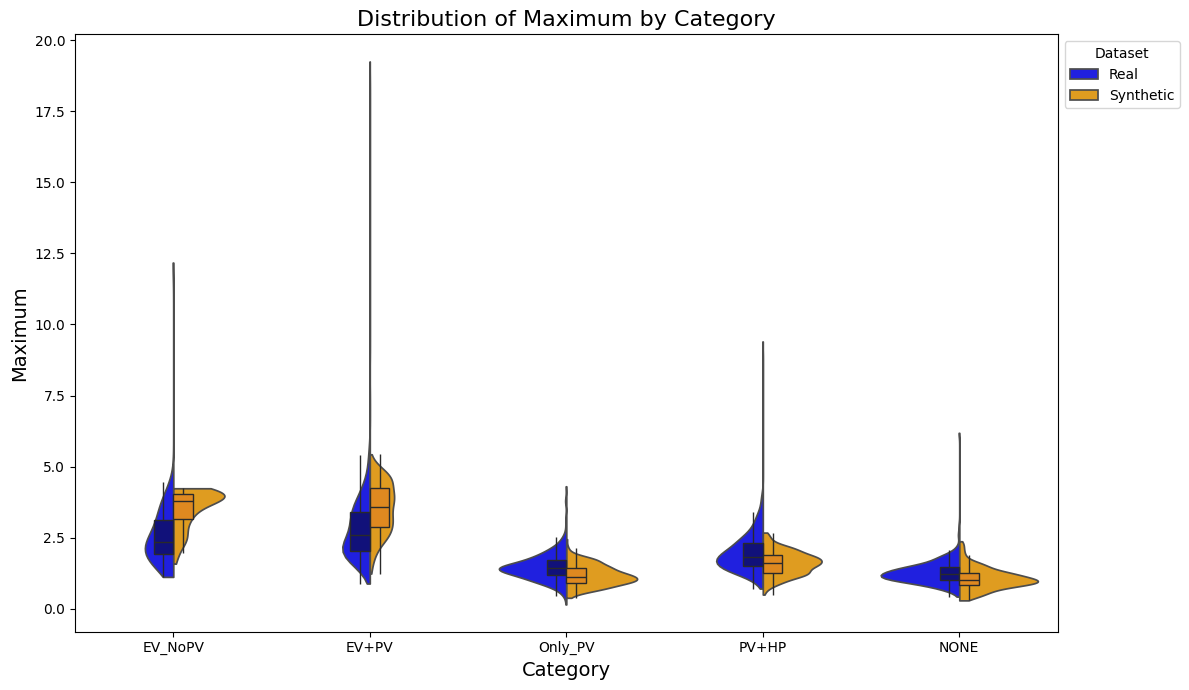

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define a function to process data
def process_data(time_series, labels):
    # Aggregate features
    features_df = time_series.agg(
        ['mean', 'std', 'min', 'max', 'median', 'skew', 'sum']
    ).transpose()
    # Reset index and merge with labels
    features_df.reset_index(inplace=True)
    features_df.rename(columns={'index': 'ID'}, inplace=True)
    features_df['ID'] = features_df['ID'].astype(int)
    merged_df = pd.merge(features_df, labels[['ID', 'Category']], on='ID')
    return merged_df

# Step 2: Process both real and synthetic data
real_data = process_data(real_time_series, real_labels_df)
synthetic_data = process_data(synthetic_timeSeries, synthetic_labels_df)

# Add a column to distinguish datasets
real_data['Dataset'] = 'Real'
synthetic_data['Dataset'] = 'Synthetic'

# Combine real and synthetic data
combined_data = pd.concat([real_data, synthetic_data], ignore_index=True)

# Step 3: Define the features to plot
features_to_plot = [
    ('mean', "Mean"),
    ('std', "Standard Deviation"),
    ('median', "Median"),
    ('skew', "Skewness"),
    ('sum', "Sum"),
    ('min', "Minimum"),
    ('max', "Maximum")
]

# Step 4: Plot each feature
for feature, title in features_to_plot:
    plt.figure(figsize=(12, 7))
    
    # Violin plot for real vs synthetic data
    sns.violinplot(
        data=combined_data,
        x="Category",
        y=feature,
        hue="Dataset",
        split=True,  # Split by dataset
        palette={"Real": "blue", "Synthetic": "orange"},
        cut=0,  # Restrict violin to data range
        inner=None  # Disable inner lines to prevent overlap with boxplot
    )
    
    # Boxplot overlaid on the violin plot
    sns.boxplot(
        data=combined_data,
        x="Category",
        y=feature,
        hue="Dataset",
        palette={"Real": "darkblue", "Synthetic": "darkorange"},  # Different colors
        width=0.2,  # Narrow width to fit inside the violins
        showcaps=False,  # Hide caps for a cleaner look
        boxprops={'zorder': 2},  # Ensure boxplot is above violin plot
        showfliers=False,  # Hide outliers for clarity
        dodge=True  # Align boxplots with violins
    )
    
    # Adjust legend
    handles, labels = plt.gca().get_legend_handles_labels()
    n = len(handles) // 2
    plt.legend(handles[:n], ["Real", "Synthetic"], title="Dataset", loc="upper left", bbox_to_anchor=(1, 1))
    
    # Add plot title and labels
    plt.title(f'Distribution of {title} by Category', fontsize=16)
    plt.xlabel("Category", fontsize=14)
    plt.ylabel(title, fontsize=14)
    
    # Adjust layout for readability
    plt.tight_layout()
    plt.show()



## Train models

In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [139]:
def model_trainer(X,y):

    # Encode labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    best_accuracy = 0
    best_xgb_model = None  # Placeholder for the best model

    # K-Fold Cross-Validation
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        # Split data into training and validation sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        # Train the XGBoost model
        xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
        xgb_model.fit(X_train, y_train)
        
        # Make predictions and calculate accuracy
        y_pred = xgb_model.predict(X_test)
        fold_accuracy = accuracy_score(y_test, y_pred)
        
        # Check if this is the best model so far
        if fold_accuracy > best_accuracy:
            best_accuracy = fold_accuracy
            best_xgb_model = xgb_model  # Store the model with the best accuracy

        print(f"Fold {fold + 1} Accuracy: {fold_accuracy:.2f}")

    # After cross-validation, save the best model to a file
    joblib.dump(best_xgb_model, 'best_xgb_model.joblib')
    print(f"Best Fold Accuracy: {best_accuracy:.2f}")
    return best_xgb_model,label_encoder

In [8]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
import joblib

def model_trainer_gridSearch(X, y, param_grid=None):
    # Encode labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    best_accuracy = 0
    best_xgb_model = None  # Placeholder for the best model

    # Define default parameter grid if not provided
    if param_grid is None:
        param_grid = {
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'n_estimators': [50, 100, 200],
            'subsample': [0.8, 1.0]
        }

    # K-Fold Cross-Validation
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        # Split data into training and validation sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        # Preprocessing pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
        ])
        
        # Hyperparameter optimization
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid={'xgb__' + k: v for k, v in param_grid.items()},
            scoring='accuracy',
            cv=3,
            n_jobs=-1
        )
        
        # Fit the grid search on training data
        grid_search.fit(X_train, y_train)
        
        # Best model from grid search
        best_pipeline = grid_search.best_estimator_
        
        # Make predictions and calculate metrics
        y_pred = best_pipeline.predict(X_test)
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_f1 = f1_score(y_test, y_pred, average='weighted')
        fold_precision = precision_score(y_test, y_pred, average='weighted')
        fold_recall = recall_score(y_test, y_pred, average='weighted')
        
        print(f"Fold {fold + 1} Accuracy: {fold_accuracy:.2f}, F1-Score: {fold_f1:.2f}, Precision: {fold_precision:.2f}, Recall: {fold_recall:.2f}")

        # Check if this is the best model so far
        if fold_accuracy > best_accuracy:
            best_accuracy = fold_accuracy
            best_xgb_model = best_pipeline  # Store the best pipeline

    # Save the best model to a file
    joblib.dump(best_xgb_model, 'best_xgb_model.joblib')
    print(f"Best Fold Accuracy: {best_accuracy:.2f}")
    return best_xgb_model, label_encoder


In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

def model_trainer_advanced(X, y, algorithm='xgboost', param_distributions=None, save_model_path='best_model.joblib'):
    """
    Train a model using refined hyperparameter tuning and cross-validation.
    
    Parameters:
    - X: pd.DataFrame, Feature matrix.
    - y: pd.Series or np.ndarray, Target labels.
    - algorithm: str, Algorithm to use ('xgboost' or 'random_forest').
    - param_distributions: dict, Hyperparameter distribution for RandomizedSearchCV.
    - save_model_path: str, Path to save the best model.

    Returns:
    - best_model: sklearn Pipeline, Best pipeline model.
    - label_encoder: sklearn.preprocessing.LabelEncoder, Encoder for labels.
    """
    # Encode target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Handle class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X, y_encoded = smote.fit_resample(X, y_encoded)

    # Initialize Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    best_accuracy = 0
    best_model = None

    # Define refined parameter distributions for RandomizedSearchCV
    if param_distributions is None:
        if algorithm == 'xgboost':
            param_distributions = {
                'learning_rate': [0.01, 0.05, 0.1, 0.2],
                'max_depth': [3, 5, 7, 9],
                'n_estimators': [50, 100, 200, 300],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'gamma': [0, 0.1, 0.2, 0.3],
                'min_child_weight': [1, 3, 5],
                'reg_alpha': [0, 0.01, 0.1],
                'reg_lambda': [1, 1.5, 2]
            }
        elif algorithm == 'random_forest':
            param_distributions = {
                'n_estimators': [50, 100, 200, 300],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2'],
                'bootstrap': [True, False]
            }

    # Cross-validation loop
    for fold, (train_index, test_index) in enumerate(skf.split(X, y_encoded)):
        print(f"\nStarting Fold {fold + 1}")
        
        # Split data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Define pipeline
        if algorithm == 'xgboost':
            model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
        elif algorithm == 'random_forest':
            model = RandomForestClassifier(random_state=42)
        else:
            raise ValueError("Unsupported algorithm. Choose 'xgboost' or 'random_forest'.")

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        # Refined hyperparameter optimization
        random_search = RandomizedSearchCV(
            estimator=pipeline, # normalize the data
            param_distributions={'model__' + k: v for k, v in param_distributions.items()},
            scoring='accuracy',  # Customize scoring metric if needed
            cv=3,
            n_iter=100,  # Increased number of iterations
            n_jobs=-1,
            random_state=42,
            verbose=1
        )

        # Fit the random search
        random_search.fit(X_train, y_train)

        # Best model and metrics
        best_pipeline = random_search.best_estimator_
        y_pred = best_pipeline.predict(X_test)
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_f1 = f1_score(y_test, y_pred, average='weighted')
        fold_precision = precision_score(y_test, y_pred, average='weighted')
        fold_recall = recall_score(y_test, y_pred, average='weighted')

        print(f"Fold {fold + 1} Metrics:")
        print(f" - Accuracy: {fold_accuracy:.2f}")
        print(f" - F1-Score: {fold_f1:.2f}")
        print(f" - Precision: {fold_precision:.2f}")
        print(f" - Recall: {fold_recall:.2f}")

        # Check for best model
        if fold_accuracy > best_accuracy:
            best_accuracy = fold_accuracy
            best_model = best_pipeline

    # Save the best model
    joblib.dump(best_model, save_model_path)
    print(f"\nBest Model Saved: {save_model_path}")
    print(f"Best Fold Accuracy: {best_accuracy:.2f}")

    return best_model, label_encoder


In [10]:
# Train models on synthetic and real datasets
#Avaialbe functions are 
 # model_trainer, model_trainer_advanced, model_trainer_gridSearch

model_synthetic, label_encoder_syn = model_trainer_advanced(X_trainTest_synthetic, y_trainTest_synthetic, algorithm='xgboost',  # or 'random_forest'
    save_model_path='best_model_syntheticData.joblib')
model_real, label_encoder_real = model_trainer_advanced(X_trainTest_real, y_trainTest_real,  algorithm='xgboost',  # or 'random_forest'
    save_model_path='best_model_realData.joblib')


Starting Fold 1
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fold 1 Metrics:
 - Accuracy: 0.96
 - F1-Score: 0.96
 - Precision: 0.96
 - Recall: 0.96

Starting Fold 2
Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

Overall Accuracy: 0.58

Classification Report:

              precision    recall  f1-score     support
EV+PV          0.500000  0.016393  0.031746   61.000000
EV_NoPV        0.151515  0.750000  0.252101   20.000000
NONE           0.920635  0.983051  0.950820   59.000000
Only_PV        0.864865  0.516129  0.646465   62.000000
PV+HP          0.762712  0.775862  0.769231   58.000000
accuracy       0.580769  0.580769  0.580769    0.580769
macro avg      0.639945  0.608287  0.530072  260.000000
weighted avg   0.714256  0.580769  0.568358  260.000000


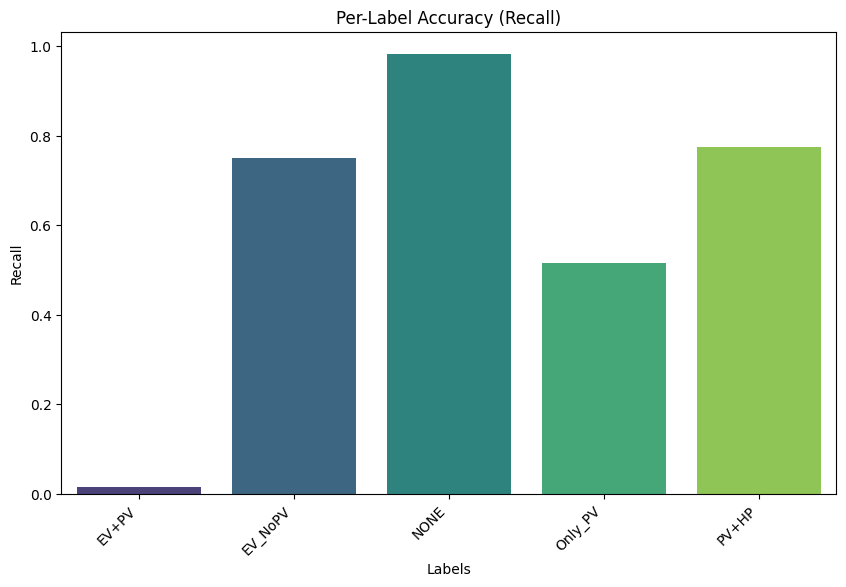

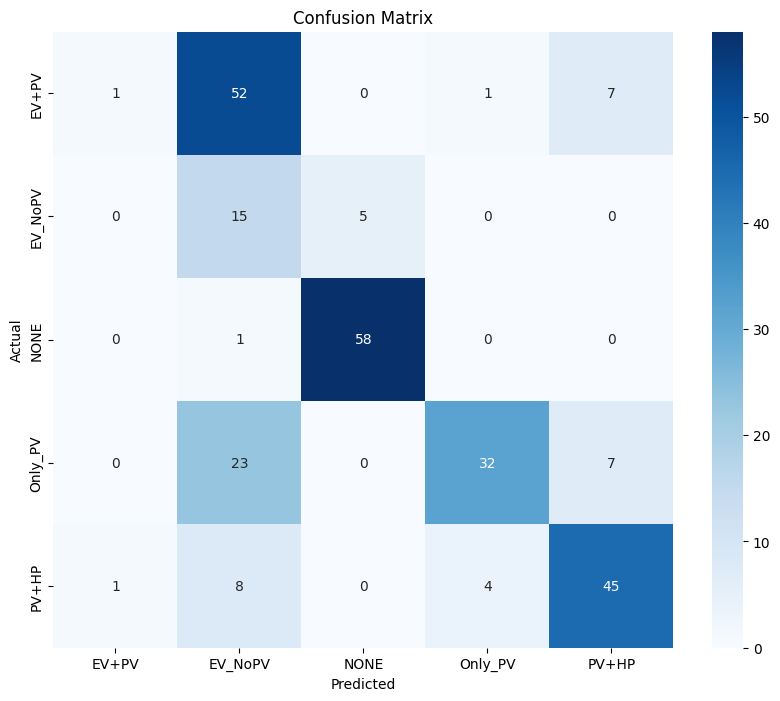

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_valid=X_valid_real
y_valid=y_valid_real
#XGmodel=model_real

#X_valid=X_valid_synthetic
#y_valid=y_valid_synthetic
XGmodel=model_synthetic
## label_encoder is the same for both models
label_encoder=label_encoder_syn

# Assuming `label_encoder` has been fitted on the original `y` during training
y_pred=XGmodel.predict(X_valid)
# Step 1: Decode the encoded true labels and predicted labels
y_pred_label = label_encoder.inverse_transform(y_pred)  # Decode y_encoded to original labels

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(y_valid, y_pred_label)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Detailed classification report for per-label accuracy (using original labels)
classification_report_dict = classification_report(y_valid, y_pred_label, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display per-label accuracy (recall for each label)
print("\nClassification Report:\n")
print(classification_report_df)

# Plot per-label accuracy (recall)
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_report_df.index[:-3], y=classification_report_df['recall'][:-3], palette="viridis")
plt.title("Per-Label Accuracy (Recall)")
plt.xlabel("Labels")
plt.ylabel("Recall")
plt.xticks(rotation=45, ha="right")
plt.show()

# Step 4: Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_label, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 5: Feature Importance (Top 10)
# Get feature importances from the best model
#feature_importances = XGmodel.feature_importances_
#features = X_valid.columns  # Assuming `X_train` has the original features
#importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
#
## Sort by importance and select the top 10 features
#top_10_importances = importance_df.sort_values(by='Importance', ascending=False).head(10)
#
## Plot the top 10 feature importances
#plt.figure(figsize=(10, 6))
#sns.barplot(x='Importance', y='Feature', data=top_10_importances, palette="viridis")
#plt.title("Top 10 Feature Importances")
#plt.show()


## comparison

In [1]:
import pandas
df=pandas.read_csv("C:\\Users\\SHARIFIM\\OneDrive - VITO\Moderate\\3_Working documents\\WP4 - Data enhancement\\HVAC_spatial_allocation\\Datasets\\Fluvius\\P6269_1_50_DMK_Sample_Elek.csv", sep=';')

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\SHARIFIM\AppData\Local\Temp\ipykernel_24592\30391997.py:2: SyntaxWarning: invalid escape sequence '\M'
  df=pandas.read_csv("C:\\Users\\SHARIFIM\\OneDrive - VITO\Moderate\\3_Working documents\\WP4 - Data enhancement\\HVAC_spatial_allocation\\Datasets\\Fluvius\\P6269_1_50_DMK_Sample_Elek.csv", sep=';')


In [2]:
df

,EAN_ID,Datum,Datum_Startuur,Volume_Afname_kWh,Volume_Injectie_kWh,Warmtepomp_Indicator,Elektrisch_Voertuig_Indicator,PV-Installatie_Indicator,Contract_Categorie
0,1,2022-01-01,2022-01-01T00:00:00.000Z,0.760,0.0,0,1,0,Residentieel
1,1,2022-01-01,2022-01-01T00:15:00.000Z,0.789,0.0,0,1,0,Residentieel
2,1,2022-01-01,2022-01-01T00:30:00.000Z,1.131,0.0,0,1,0,Residentieel
3,1,2022-01-01,2022-01-01T00:45:00.000Z,0.791,0.0,0,1,0,Residentieel
4,1,2022-01-01,2022-01-01T01:00:00.000Z,0.791,0.0,0,1,0,Residentieel
...,...,...,...,...,...,...,...,...,...
45551995,1300,2022-12-31,2022-12-31T22:45:00.000Z,0.459,0.0,0,1,1,Residentieel
45551996,1300,2022-12-31,2022-12-31T23:00:00.000Z,0.171,0.0,0,1,1,Residentieel
45551997,1300,2022-12-31,2022-12-31T23:15:00.000Z,0.154,0.0,0,1,1,Residentieel
45551998,1300,2022-12-31,2022-12-31T23:30:00.000Z,0.506,0.0,0,1,1,Residentieel


# LSTM

## import data

In [27]:
import glob, os,warnings,copy
from pathlib import Path
import pandas as pd
#####
directory = Path.cwd()
time_series_Consumption=pd.read_pickle(os.path.join(directory,'all_time_series_Consumption.pkl'))
time_series_Consumption.set_index('Datetime', inplace=True)
labels_df_org=pd.read_pickle(os.path.join(directory,'labels_df.pkl'))[['ID','Category']]


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import optuna, copy

# ----------------------------
# 1. Set up device (GPU if available)
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ----------------------------
# 2. Load and prepare data
# ----------------------------
if time_series_Consumption is None or labels_df_org is None:
    raise ValueError("Error: One of the datasets is None. Ensure they are properly loaded.")

time_series_df = pd.DataFrame(time_series_Consumption)
labels_df = copy.copy(labels_df_org)
labels_df.set_index('ID', inplace=True)
time_series_df.columns = time_series_df.columns.astype(int)
labels_df.index = labels_df.index.astype(int)

common_ids = list(set(time_series_df.columns).intersection(set(labels_df.index)))
if not common_ids:
    raise ValueError("Error: No matching IDs found.")

time_series_df = time_series_df[common_ids]
labels_df = labels_df.loc[common_ids]

# ✅ Normalize using MinMaxScaler (original way)
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series_df)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_df['Category'])

# Create sequences
def create_sequences(data, labels, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(labels[i])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 10
X, y = create_sequences(time_series_scaled.T, labels_encoded, sequence_length)

# ----------------------------
# 3. Optuna hyperparameter optimization
# ----------------------------

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout, bidirectional):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
        multiplier = 2 if bidirectional else 1
        self.fc = nn.Linear(hidden_dim * multiplier, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

def create_dataloader(X_data, y_data, batch_size):
    X_tensor = torch.tensor(X_data, dtype=torch.float32)
    y_tensor = torch.tensor(y_data, dtype=torch.long)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

best_trial_losses = []

def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 256)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.0, 0.5)
    bidirectional = trial.suggest_categorical("bidirectional", [True, False])
    learning_rate = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    num_epochs = 20

    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    train_loader = create_dataloader(X_train_split, y_train_split, batch_size)
    val_loader = create_dataloader(X_val_split, y_val_split, batch_size)

    model = LSTMModel(X.shape[2], hidden_dim, len(np.unique(y)), num_layers, dropout, bidirectional).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    trial_losses = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        trial_losses.append(epoch_loss / len(train_loader))

    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.to(device)
            preds = torch.argmax(model(batch_x), dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_targets.extend(batch_y.numpy())

    accuracy = accuracy_score(all_targets, all_preds)

    if accuracy > getattr(objective, "best_accuracy", 0):
        objective.best_accuracy = accuracy
        global best_trial_losses
        best_trial_losses = trial_losses

    return 1.0 - accuracy

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# ----------------------------
# 4. Train final model using best hyperparameters
# ----------------------------

best_model = LSTMModel(
    X.shape[2], best_params['hidden_dim'], len(np.unique(y)),
    best_params['num_layers'], best_params['dropout'], best_params['bidirectional']
).to(device)

optimizer = optim.Adam(best_model.parameters(), lr=best_params['lr'])
criterion = nn.CrossEntropyLoss()
batch_size = best_params['batch_size']
train_loader = create_dataloader(X, y, batch_size)

for epoch in range(20):
    best_model.train()
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        loss = criterion(best_model(batch_x), batch_y)
        loss.backward()
        optimizer.step()

# ----------------------------
# 5. Evaluate the final model
# ----------------------------
X_test_tensor = torch.tensor(X, dtype=torch.float32).to(device)
with torch.no_grad():
    logits = best_model(X_test_tensor)
    y_pred = torch.argmax(logits, dim=1).cpu().numpy()

y_true = y
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_true)

# ----------------------------
# 6. Plotting
# ----------------------------
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(best_trial_losses, label='Training Loss')
plt.title('Best Trial: Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(y_true_labels[:20], label='Actual', marker='o', linestyle="None")
plt.plot(y_pred_labels[:20], label='Predicted', marker='x', linestyle="None")
plt.title('Actual vs Predicted Categories (First 20 Samples)')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)